# TOTO

## 00. Import and define function

In [127]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import seaborn as sns
from pandas.core.groupby.groupby import GroupBy
import folium

from plotly import plot
from termcolor import colored
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings(action='ignore')
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''
plt.rc('font', family='NanumBarunGothic')

In [128]:
def Playwell(trace1):
    x = top6_player[top6_player["name_season"] == trace1]
    if x['position'].values[0] == "Goalkeeper":
      trace1 = go.Scatterpolar(
        r = [x['clean_sheets_overall'].values[0],x['clean_sheets_home'].values[0],x['clean_sheets_away'].values[0]],
        theta = ['clean_sheets_overall','clean_sheets_home','clean_sheets_away'],
        fill = 'toself',
        name = trace1
      )

    else:
      trace1 = go.Scatterpolar(
        r = [x['goals_overall'].values[0],x['assists_overall'].values[0],x['penalty_goals'].values[0],x['goals_home'].values[0],x['goals_away'].values[0]],
        theta = ['goals_overall','assists_overall','penalty_goals','goals_home','goals_away'],
        fill = 'toself',
        name = trace1
      )
    return trace1

def PlayerSpotlight(trace1):
    trace1 = Playwell(trace1)
    layout = go.Layout(
          xaxis=dict(
            domain=[0, 0.45]
            ),
            yaxis=dict(
            domain=[0, 0.45]
            ),
        
           
          showlegend = True,
          title = "Player Performance"
    )

    data = [trace1]
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename = "Player stats")

def PlayerFight(trace1,trace2,trace3,trace4):
    trace1 = Playwell(trace1) #calling the Helper function defined before
    trace2 = Playwell(trace2)
    trace3 = Playwell(trace3)
    trace4 = Playwell(trace4)
    layout = go.Layout(
      xaxis=dict(
            domain=[0, 0.50]
        ),
        yaxis=dict(
            domain=[0, 0.50]
        ),
        xaxis2=dict(
            domain=[0.70, 1]
        ),
        xaxis3=dict(
            domain=[0, 0.50],
            anchor='y3'
        ),
        xaxis4=dict(
            domain=[0.70, 1],
            anchor='y4'
        ),
        yaxis2=dict(
            domain=[0, 0.50],
            anchor='x2'
        ),
        yaxis3=dict(
            domain=[0.70, 1]
        ),
        yaxis4=dict(
            domain=[0.70, 1],
            anchor='x4'
        ),
      showlegend = True,
      title = "Player Fight (who will you bet on!)"
    )

    data = [trace1, trace2, trace3, trace4]
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename = "Player Fight")

def players_age(trace1, trace2, trace3):
  player_age = top6_player[(top6_player['age'] > 0) & (top6_player['Current Club'] == trace1)]
  player_age2 = top6_player[(top6_player['age'] > 0) & (top6_player['Current Club'] == trace2)]
  player_age3 = top6_player[(top6_player['age'] > 0) & (top6_player['Current Club'] == trace3)]
  player_age4 = top6_player[(top6_player['age'] > 0)]
  ranges=[10,23,26,31,40,45]
  
  plt.title(trace1 + ', ' + trace2 +', '+ trace3)
  player_age['age'].plot(kind='hist' ,bins=[15,20,25,30,35,40,45,50], alpha = 0.5,label= trace1, figsize=(10,5))
  player_age2['age'].plot(kind='hist',bins=[15,20,25,30,35,40,45,50],alpha = 0.5,label= trace2)
  player_age3['age'].plot(kind='hist',bins=[15,20,25,30,35,40,45,50], alpha = 0.5,label= trace3)
  plt.legend(loc='upper left')
  plt.show()

  age_bins = pd.cut(player_age['age'],ranges)
  age_bins2 = pd.cut(player_age2['age'],ranges)
  age_bins3 = pd.cut(player_age3['age'],ranges)
  age_bins4 = pd.cut(player_age4['age'],ranges)
  player_age['age_bins'] = age_bins
  player_age2['age_bins'] = age_bins2
  player_age3['age_bins'] = age_bins3
  player_age4['age_bins'] = age_bins4

  age_groups = player_age.groupby('age_bins').mean()
  age_groups2 = player_age2.groupby('age_bins').mean()
  age_groups3 = player_age3.groupby('age_bins').mean()
  age_groups4 = player_age4.groupby('age_bins').mean()
  

  plt.title('Goals overall ' + trace1 + ', ' + trace2 +', '+ trace3)
  age_groups['goals_overall'].plot(label= trace1, alpha = 0.5, figsize=(10,5),color='r')
  age_groups2['goals_overall'].plot(label= trace2, alpha = 0.5,color='g')
  age_groups3['goals_overall'].plot(label= trace3, alpha = 0.5,color= 'b')
  age_groups4['goals_overall'].plot(label= 'average', alpha = 0.5,color= 'black',marker='o', linestyle='--')
  plt.legend(loc='upper left')
  plt.show()

  plt.title('appearances_overall ' + trace1 + ', ' + trace2 +', '+ trace3)
  age_groups['appearances_overall'].plot(label= trace1, alpha = 0.5, figsize=(10,5),color='r')
  age_groups2['appearances_overall'].plot(label= trace2, alpha = 0.5,color='g')
  age_groups3['appearances_overall'].plot(label= trace3, alpha = 0.5,color= 'b')
  age_groups4['appearances_overall'].plot(label= 'average', alpha = 0.5,color= 'black',marker='o', linestyle='--')
  plt.legend(loc='upper left')
  plt.show()

def SeasonPerformance(trace1):
  season_df = top6_player.sort_values(by = 'season', ascending=True)
  season_df = season_df[season_df['season'] < '2022']
  fig, ax = plt.subplots(figsize=(20, 10))
  p = sns.lineplot(x="season", y=trace1, hue="Current Club", ci=None, data=season_df, ax=ax)
  plt.title(trace1)

def ForeignerPerformance(trace1):
  fig, ax = plt.subplots(figsize=(20, 10))
  foreigner = top6_player[top6_player['nationality'] != 'South Korea']
  top_nations = foreigner.groupby(by=['nationality'])[trace1].sum().reset_index().sort_values(by=[trace1], ascending=False).head(10)
  sns.barplot(y='nationality', x=trace1, data=top_nations, palette=sns.color_palette("Reds_r", 10),ax=ax)
  plt.title(trace1)

In [129]:
MATCHES_path = "/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/matches/k-league-1-matches*.csv"
MATCHES_files = glob(MATCHES_path)
MATCHES = pd.concat(map(pd.read_csv, MATCHES_files), ignore_index=True)

TEAMS_path = "/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/teams/k-league-1-teams*.csv"
TEAMS_files = glob(TEAMS_path)
TEAMS = pd.concat(map(pd.read_csv, TEAMS_files), ignore_index=True)

PLAYERS_path = "/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/players/k-league-1-players*.csv"
PLAYERS_files = glob(PLAYERS_path)
PLAYERS = pd.concat(map(pd.read_csv, PLAYERS_files), ignore_index=True)

In [130]:
glob('/content/drive/MyDrive/k_leauge/K리그 1부/k-league-1-matches*.csv')

[]

In [131]:
all_csv = pd.read_csv(glob('/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/matches/k-league-1-matches*.csv')[0])
for i in range(1,len(glob('/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/matches/k-league-1-matches*.csv'))):
  sample = pd.read_csv(glob('/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/matches/k-league-1-matches*.csv')[i])
  all_csv = pd.concat([all_csv,sample])

## 01. Team



*   새 feature로 활용할 columns 생성



In [132]:
TEAMS['shots_per_match'] = round(TEAMS['shots'] / TEAMS['matches_played'], 2)
TEAMS['shots_on_target_ratio'] = round(TEAMS['shots_on_target'] / TEAMS['shots'], 2)
TEAMS['fouls_per_match'] = round(TEAMS['fouls'] / TEAMS['matches_played'], 2)



*   TOP6 팀 추출



In [133]:
TEAMS_TOP6_English = ['FC Seoul', 'Pohang Steelers FC', 'Ulsan Hyundai Horang-i', 'Jeonbuk Hyundai Motors FC', 'Incheon United FC', 'Suwon Samsung Bluewings FC']
TEAMS_TOP6 = TEAMS[TEAMS['team_name'].isin(TEAMS_TOP6_English)]

In [134]:
# '한글 팀 이름' 추가
TEAMS_TOP6_Korean = ['FC 서울', '포항 스틸러스 FC', '울산 현대 호랑이', '전북 현대 모터스 FC', '인천 유나이티드 FC', '수원 삼성 블루윙즈 FC']
TEAMS_TOP6['korean_name'] = TEAMS_TOP6['team_name'].replace(TEAMS_TOP6_English, TEAMS_TOP6_Korean)
TEAMS_TOP6.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage,shots_per_match,shots_on_target_ratio,fouls_per_match,korean_name
2,FC Seoul,FC Seoul,2022,South Korea,14,6,8,0,4,3,...,17,50,36,33,38,0,11.43,0.44,9.50,FC 서울
4,Pohang Steelers FC,Pohang Steelers,2022,South Korea,14,6,8,0,6,3,...,33,25,29,17,38,0,12.29,0.51,13.57,포항 스틸러스 FC
5,Ulsan Hyundai Horang-i,Ulsan,2022,South Korea,14,7,7,0,10,5,...,29,14,7,0,14,0,11.79,0.47,8.93,울산 현대 호랑이
6,Jeonbuk Hyundai Motors FC,Jeonbuk Motors,2022,South Korea,14,6,8,0,7,1,...,50,13,21,33,13,0,9.07,0.43,13.79,전북 현대 모터스 FC
8,Incheon United FC,Incheon United,2022,South Korea,14,8,6,0,5,2,...,50,33,21,25,17,0,8.93,0.51,11.43,인천 유나이티드 FC




*   팀별 data 병합



In [135]:
attribute = ['goals_scored_per_match', 'xg_for_avg_overall', 'shots_per_match', 'corners_per_match', 'goals_conceded_per_match', 'xg_against_avg_overall', 'clean_sheet_percentage', 'average_possession', 'shots_on_target_ratio', 'fouls_per_match']
matches_played = TEAMS_TOP6.groupby(['korean_name'], as_index=False)['matches_played'].sum()
TEAMS_TOP6 = TEAMS_TOP6.groupby(['korean_name'], as_index=False)[attribute].mean()
TEAMS_TOP6 = pd.concat([TEAMS_TOP6, matches_played['matches_played']], axis=1)
TEAMS_TOP6

,korean_name,goals_scored_per_match,xg_for_avg_overall,shots_per_match,corners_per_match,goals_conceded_per_match,xg_against_avg_overall,clean_sheet_percentage,average_possession,shots_on_target_ratio,fouls_per_match,matches_played
0,FC 서울,1.283,0.701,7.725,4.402,1.182,0.710,28.5,51.9,0.463,5.341,345
1,수원 삼성 블루윙즈 FC,1.290,0.654,8.173,4.172,1.207,0.696,29.9,47.2,0.438,6.821,345
2,울산 현대 호랑이,1.523,0.783,8.273,4.748,1.051,0.693,32.8,48.6,0.459,6.138,345
3,인천 유나이티드 FC,1.041,0.595,7.138,3.885,1.278,0.808,28.3,45.8,0.448,6.077,345
4,전북 현대 모터스 FC,1.701,0.907,9.973,4.601,0.892,0.637,40.5,50.8,0.461,7.221,345
5,포항 스틸러스 FC,1.392,0.726,8.625,4.775,1.151,0.721,32.1,46.6,0.469,7.330,345




*   '리그 평균' 추가



In [136]:
average = pd.Series(data=['* 리그 평균'], index=['korean_name'])

TEAMS_TOP6 = TEAMS_TOP6.append([average], ignore_index=True)
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'goals_scored_per_match'] = TEAMS['goals_scored_per_match'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'xg_for_avg_overall'] = TEAMS['xg_for_avg_overall'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'shots_per_match'] = TEAMS['shots_per_match'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'corners_per_match'] = TEAMS['corners_per_match'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'goals_conceded_per_match'] = TEAMS['goals_conceded_per_match'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'xg_against_avg_overall'] = TEAMS['xg_against_avg_overall'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'clean_sheet_percentage'] = TEAMS['clean_sheet_percentage'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'average_possession'] = TEAMS['average_possession'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'shots_on_target_ratio'] = TEAMS['shots_on_target_ratio'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'fouls_per_match'] = TEAMS['fouls_per_match'].mean()
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'matches_played'] = TEAMS['matches_played'].sum()
TEAMS_TOP6

,korean_name,goals_scored_per_match,xg_for_avg_overall,shots_per_match,corners_per_match,goals_conceded_per_match,xg_against_avg_overall,clean_sheet_percentage,average_possession,shots_on_target_ratio,fouls_per_match,matches_played
0,FC 서울,1.283000,0.701000,7.725000,4.402000,1.182000,0.710000,28.500000,51.9,0.463000,5.341000,345.0
1,수원 삼성 블루윙즈 FC,1.290000,0.654000,8.173000,4.172000,1.207000,0.696000,29.900000,47.2,0.438000,6.821000,345.0
2,울산 현대 호랑이,1.523000,0.783000,8.273000,4.748000,1.051000,0.693000,32.800000,48.6,0.459000,6.138000,345.0
3,인천 유나이티드 FC,1.041000,0.595000,7.138000,3.885000,1.278000,0.808000,28.300000,45.8,0.448000,6.077000,345.0
4,전북 현대 모터스 FC,1.701000,0.907000,9.973000,4.601000,0.892000,0.637000,40.500000,50.8,0.461000,7.221000,345.0
5,포항 스틸러스 FC,1.392000,0.726000,8.625000,4.775000,1.151000,0.721000,32.100000,46.6,0.469000,7.330000,345.0
6,* 리그 평균,1.265328,0.693115,7.777869,4.409344,1.265246,0.713279,28.336066,47.0,0.454098,5.928115,4216.0




*   결측치 제외



In [137]:
PLAYERS = PLAYERS[PLAYERS['rank_in_league_top_attackers'] != -1]
PLAYERS = PLAYERS[PLAYERS['rank_in_league_top_midfielders'] != -1]
PLAYERS = PLAYERS[PLAYERS['rank_in_league_top_defenders'] != -1]

In [138]:
PLAYERS_TOP6_English = ['FC Seoul', 'Pohang Steelers', 'Ulsan', 'Jeonbuk Motors', 'Incheon United', 'Suwon Bluewings']
PLAYERS_TOP6 = PLAYERS[PLAYERS['Current Club'].isin(PLAYERS_TOP6_English)]
PLAYERS_TOP6['korean_name'] = PLAYERS_TOP6['Current Club'].replace(PLAYERS_TOP6_English, TEAMS_TOP6_Korean)

In [139]:
attribute = ['age', 'min_per_match','rank_in_league_top_attackers', 'rank_in_league_top_midfielders', 'rank_in_league_top_defenders']
PLAYERS_TOP6 = PLAYERS_TOP6.groupby(['korean_name'], as_index=False)[attribute].mean()

In [140]:
average = pd.Series(data=['* 리그 평균'], index=['korean_name'])

PLAYERS_TOP6 = PLAYERS_TOP6.append([average], ignore_index=True)
PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'age'] = PLAYERS['age'].mean()
PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'min_per_match'] = PLAYERS['min_per_match'].mean()
PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'rank_in_league_top_attackers'] = PLAYERS['rank_in_league_top_attackers'].mean()
PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'rank_in_league_top_midfielders'] = PLAYERS['rank_in_league_top_midfielders'].mean()
PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'rank_in_league_top_defenders'] = PLAYERS['rank_in_league_top_defenders'].mean()
PLAYERS_TOP6

,korean_name,age,min_per_match,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders
0,FC 서울,31.012048,81.530120,185.240964,163.506024,46.506024
1,수원 삼성 블루윙즈 FC,31.245283,78.650943,188.547170,165.471698,50.660377
2,울산 현대 호랑이,32.075269,80.150538,179.086022,126.580645,40.150538
3,인천 유나이티드 FC,30.448980,79.704082,201.663265,169.469388,56.163265
4,전북 현대 모터스 FC,32.540000,81.550000,200.020000,142.270000,27.940000
5,포항 스틸러스 FC,31.519481,78.883117,183.519481,155.363636,47.909091
6,* 리그 평균,31.265071,79.310284,190.597518,164.406028,57.781028


In [141]:
MATCHES_TOP6_English = ['FC Seoul', 'Pohang Steelers', 'Ulsan', 'Jeonbuk Motors', 'Incheon United', 'Suwon Bluewings']
MATCHES['home_team_name_kor'] = MATCHES['home_team_name'].replace(MATCHES_TOP6_English, TEAMS_TOP6_Korean)
MATCHES['away_team_name_kor'] = MATCHES['away_team_name'].replace(MATCHES_TOP6_English, TEAMS_TOP6_Korean)

In [142]:
MATCHES['ht_winner_home'] = MATCHES['home_team_goal_count_half_time'] > MATCHES['away_team_goal_count_half_time']
MATCHES['ht_winner_away'] = MATCHES['away_team_goal_count_half_time'] > MATCHES['home_team_goal_count_half_time']
MATCHES['ht_draw'] = MATCHES['away_team_goal_count_half_time'] == MATCHES['home_team_goal_count_half_time']

MATCHES['ht_winner_name'] = '(Draw)'
for i in MATCHES[MATCHES['ht_winner_home'] == True].index:
  MATCHES.at[i,'ht_winner_name'] = MATCHES.at[i,'home_team_name_kor']
for i in MATCHES[MATCHES['ht_winner_away'] == True].index:
  MATCHES.at[i,'ht_winner_name'] = MATCHES.at[i,'away_team_name_kor']

In [143]:
MATCHES['winner_home'] = MATCHES['home_team_goal_count'] > MATCHES['away_team_goal_count']
MATCHES['winner_away'] = MATCHES['away_team_goal_count'] > MATCHES['home_team_goal_count']
MATCHES['draw'] = MATCHES['away_team_goal_count'] == MATCHES['home_team_goal_count']

MATCHES['winner_name'] = '(Draw)'
for i in MATCHES[MATCHES['winner_home'] == True].index:
  MATCHES.at[i,'winner_name'] = MATCHES.at[i,'home_team_name_kor']
for i in MATCHES[MATCHES['winner_away'] == True].index:
  MATCHES.at[i,'winner_name'] = MATCHES.at[i,'away_team_name_kor']

In [144]:
MATCHES['comeback'] = ((MATCHES['ht_winner_name'] != '(Draw)')&\
                       (MATCHES['winner_name'] != '(Draw)')&\
                       (MATCHES['winner_name'] != MATCHES['ht_winner_name']))

In [145]:
MATCHES['fav_home'] = MATCHES['odds_ft_away_team_win'] < MATCHES['odds_ft_home_team_win']
MATCHES['fav_away'] = MATCHES['odds_ft_home_team_win'] < MATCHES['odds_ft_away_team_win']
MATCHES['fav_none'] = MATCHES['odds_ft_home_team_win'] == MATCHES['odds_ft_away_team_win']

MATCHES['fav_name'] = '(None)'
for i in MATCHES[MATCHES['fav_home'] == True].index:
  MATCHES.at[i,'fav_name'] = MATCHES.at[i,'home_team_name_kor']
for i in MATCHES[MATCHES['fav_away'] == True].index:
  MATCHES.at[i,'fav_name'] = MATCHES.at[i,'away_team_name_kor']

MATCHES['unfav_win'] = ((MATCHES['fav_name'] != '(None)')&\
                             (MATCHES['fav_name'] == MATCHES['winner_name']))

In [146]:
MATCHES_TOP6 = MATCHES[(MATCHES['home_team_name_kor']=='FC 서울')|\
                       (MATCHES['home_team_name_kor']=='포항 스틸러스 FC')|\
                       (MATCHES['home_team_name_kor']=='울산 현대 호랑이')|\
                       (MATCHES['home_team_name_kor']=='전북 현대 모터스 FC')|\
                       (MATCHES['home_team_name_kor']=='인천 유나이티드 FC')|\
                       (MATCHES['home_team_name_kor']=='수원 삼성 블루윙즈 FC')|\
                       (MATCHES['away_team_name_kor']=='FC 서울')|\
                       (MATCHES['away_team_name_kor']=='포항 스틸러스 FC')|\
                       (MATCHES['away_team_name_kor']=='울산 현대 호랑이')|\
                       (MATCHES['away_team_name_kor']=='전북 현대 모터스 FC')|\
                       (MATCHES['away_team_name_kor']=='인천 유나이티드 FC')|\
                       (MATCHES['away_team_name_kor']=='수원 삼성 블루윙즈 FC')
                      ]

In [147]:
attribute = ['home_team_name_kor', 'away_team_name_kor', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time', 'home_team_goal_count', 'comeback', 'away_team_goal_count', 'odds_ft_home_team_win', 'odds_ft_draw', 'odds_ft_away_team_win', 'unfav_win']
MATCHES_TOP6 = MATCHES_TOP6.loc[:,attribute]
MATCHES_TOP6

,home_team_name_kor,away_team_name_kor,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_count,comeback,away_team_goal_count,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,unfav_win
0,전북 현대 모터스 FC,Suwon,0,0,1,False,0,1.66,3.65,4.25,False
1,Daegu,FC 서울,0,1,0,False,2,1.88,3.46,4.12,True
2,인천 유나이티드 FC,수원 삼성 블루윙즈 FC,0,0,1,False,0,3.19,3.13,2.31,True
3,Jeju United,포항 스틸러스 FC,0,1,0,False,3,2.60,3.10,2.65,True
5,울산 현대 호랑이,Sangju Sangmu,0,0,0,False,0,1.90,3.30,3.75,False
...,...,...,...,...,...,...,...,...,...,...,...
2216,포항 스틸러스 FC,FC 서울,1,0,1,True,2,2.22,3.20,3.06,True
2218,Gwangju,인천 유나이티드 FC,1,1,1,False,1,2.15,3.20,3.20,False
2219,전북 현대 모터스 FC,Jeju United,0,0,2,False,0,1.89,3.70,3.86,False
2220,울산 현대 호랑이,Daegu,2,0,2,False,0,1.74,3.88,4.42,False


### 01.1 Attacking
1. 경기당 득점 : *goals_scored_per_match*
2. 경기당 기대 득점(xG) : *xg_for_avg_overall*
3. 경기당 슈팅 : *shots_per_match*
4. 경기당 코너킥 : *corners_per_match*

In [148]:
x = TEAMS_TOP6['korean_name']
y0 = TEAMS_TOP6['goals_scored_per_match']
y1 = TEAMS_TOP6['xg_for_avg_overall']
y2 = TEAMS_TOP6['shots_per_match']
y3 = TEAMS_TOP6['corners_per_match']

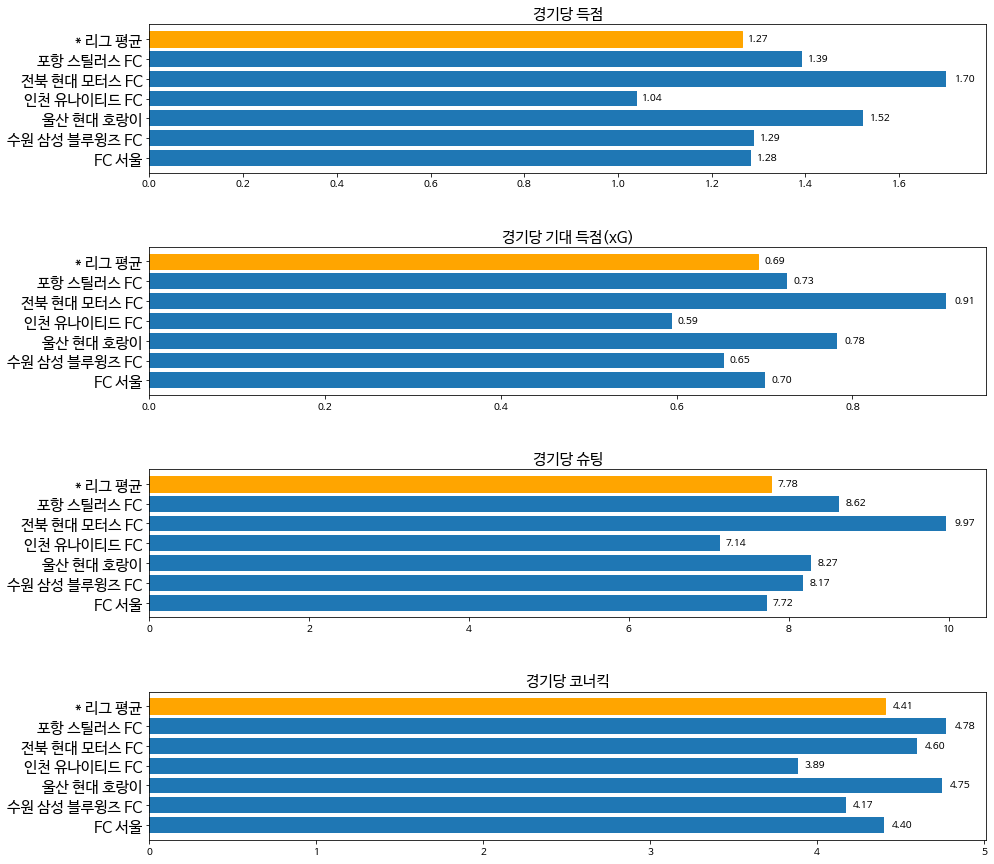

In [149]:
fig, ax = plt.subplots(4,1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

ax[0].title.set_text('경기당 득점')
ax[0].title.set_size(15)
ax[0].tick_params (axis = 'y', labelsize =15)
bars = ax[0].barh(x, y0)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[0].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[0].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[1].title.set_text('경기당 기대 득점(xG)')
ax[1].title.set_size(15)
ax[1].tick_params (axis = 'y', labelsize =15)
bars = ax[1].barh(x, y1)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[1].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[1].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[2].title.set_text('경기당 슈팅')
ax[2].title.set_size(15)
ax[2].tick_params (axis = 'y', labelsize =15)
bars = ax[2].barh(x, y2)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[2].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[2].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[3].title.set_text('경기당 코너킥')
ax[3].title.set_size(15)
ax[3].tick_params (axis = 'y', labelsize =15)
bars = ax[3].barh(x, y3)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[3].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[3].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [150]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'goals_scored_per_match'][6]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'xg_for_avg_overall'][6]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'shots_per_match'][6]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'corners_per_match'][6]

attacking = 100 / (a1 + a2 + a3 + a4)

In [151]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'goals_scored_per_match'][0]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'xg_for_avg_overall'][0]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'shots_per_match'][0]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'corners_per_match'][0]
FC_Seoul_Att = ( a1 + a2 + a3 + a4 ) * attacking
FC_Seoul_Att

99.75500790951283

In [152]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'goals_scored_per_match'][1]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'xg_for_avg_overall'][1]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'shots_per_match'][1]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'corners_per_match'][1]
Suwon_Bluewings_Att = ( a1 + a2 + a3 + a4 ) * attacking
Suwon_Bluewings_Att

101.01334476784275

In [153]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'goals_scored_per_match'][2]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'xg_for_avg_overall'][2]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'shots_per_match'][2]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'corners_per_match'][2]
Ulsan_Att = ( a1 + a2 + a3 + a4 ) * attacking
Ulsan_Att

108.35128667203624

In [154]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'goals_scored_per_match'][3]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'xg_for_avg_overall'][3]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'shots_per_match'][3]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'corners_per_match'][3]
Incheon_United_Att = ( a1 + a2 + a3 + a4 ) * attacking
Incheon_United_Att

89.49037241347338

In [155]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'goals_scored_per_match'][4]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'xg_for_avg_overall'][4]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'shots_per_match'][4]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'corners_per_match'][4]
Jeonbuk_Motors_Att = ( a1 + a2 + a3 + a4 ) * attacking
Jeonbuk_Motors_Att

121.46485336980014

In [156]:
a1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'goals_scored_per_match'][5]
a2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'xg_for_avg_overall'][5]
a3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'shots_per_match'][5]
a4 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'corners_per_match'][5]
Pohang_Steelers_Att = ( a1 + a2 + a3 + a4 ) * attacking
Pohang_Steelers_Att

109.70152453687338

### 01.2 Defending
1. 경기당 실점 : *goals_conceded_per_match*
2. 경기당 기대 실점 : *xg_against_avg_overall*
3. 무실점 경기율 : *clean_sheet_percentage*

In [157]:
x = TEAMS_TOP6['korean_name']
y0 = TEAMS_TOP6['goals_conceded_per_match']
y1 = TEAMS_TOP6['xg_against_avg_overall']
y2 = TEAMS_TOP6['clean_sheet_percentage']

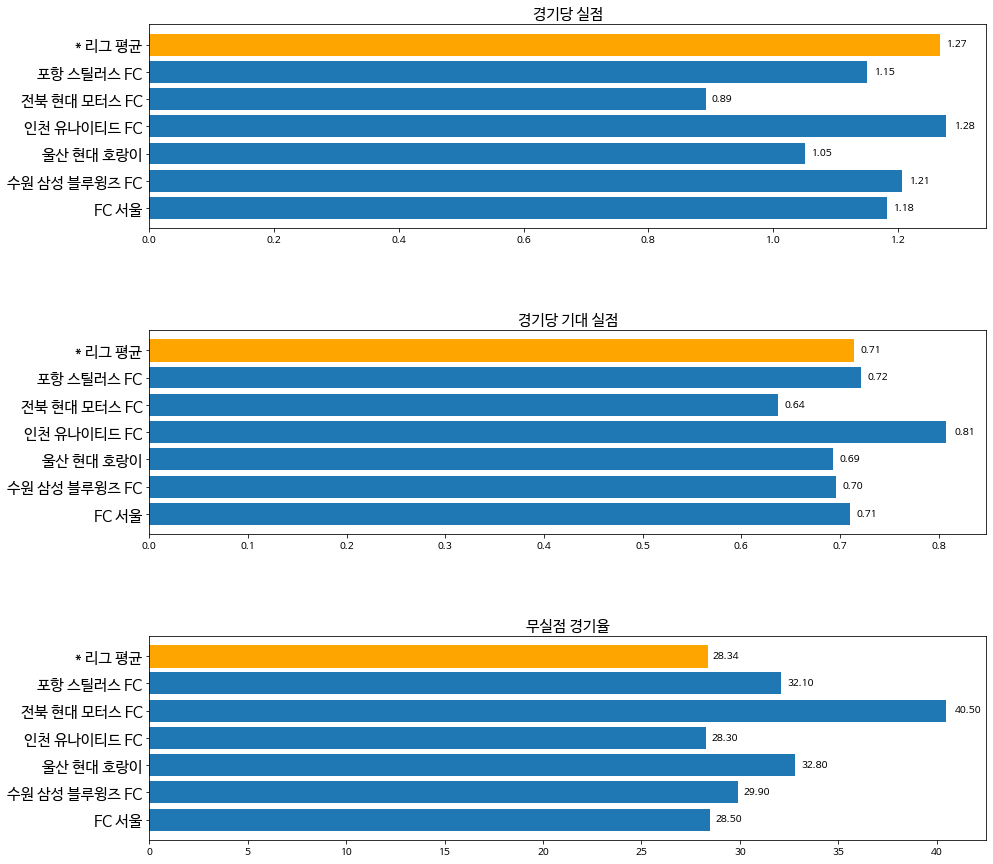

In [158]:
fig, ax = plt.subplots(3,1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

ax[0].title.set_text('경기당 실점')
ax[0].title.set_size(15)
ax[0].tick_params (axis = 'y', labelsize =15)
bars = ax[0].barh(x, y0)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[0].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[0].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[1].title.set_text('경기당 기대 실점')
ax[1].title.set_size(15)
ax[1].tick_params (axis = 'y', labelsize =15)
bars = ax[1].barh(x, y1)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[1].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[1].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[2].title.set_text('무실점 경기율')
ax[2].title.set_size(15)
ax[2].tick_params (axis = 'y', labelsize =15)
bars = ax[2].barh(x, y2)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[2].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[2].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [159]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'goals_conceded_per_match'][6]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'xg_against_avg_overall'][6]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'clean_sheet_percentage'][6]
defend = 100 / ( - d1 - d2 + d3 )

In [160]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'goals_conceded_per_match'][0]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'xg_against_avg_overall'][0]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'clean_sheet_percentage'][0]
FC_Seoul_Def = ( - d1 - d2 + d3 ) * defend
FC_Seoul_Def

100.9502366573165

In [161]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'goals_conceded_per_match'][1]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'xg_against_avg_overall'][1]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'clean_sheet_percentage'][1]
Suwon_Bluewings_Def = ( - d1 - d2 + d3 ) * defend
Suwon_Bluewings_Def

106.22007575521985

In [162]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'goals_conceded_per_match'][2]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'xg_against_avg_overall'][2]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'clean_sheet_percentage'][2]
Ulsan_Def = ( - d1 - d2 + d3 ) * defend
Ulsan_Def

117.82586250862975

In [163]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'goals_conceded_per_match'][3]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'xg_against_avg_overall'][3]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'clean_sheet_percentage'][3]
Incheon_United_Def = ( - d1 - d2 + d3 ) * defend
Incheon_United_Def

99.45540828829277

In [164]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'goals_conceded_per_match'][4]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'xg_against_avg_overall'][4]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'clean_sheet_percentage'][4]
Jeonbuk_Motors_Def = ( - d1 - d2 + d3 ) * defend
Jeonbuk_Motors_Def

147.85521921122523

In [165]:
d1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'goals_conceded_per_match'][5]
d2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'xg_against_avg_overall'][5]
d3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'clean_sheet_percentage'][5]
Pohang_Steelers_Def = ( - d1 - d2 + d3 ) * defend
Pohang_Steelers_Def

114.68444654530077

### 01.3 Technical
1. 경기당 점유율 : *average_possession*
2. 골대를 향한 슈팅률 : *shots_on_target_ratio*
3. 선수 랭크 평균 : *average_rank_in_league*

In [166]:
x = TEAMS_TOP6['korean_name']
y = TEAMS_TOP6['average_possession']

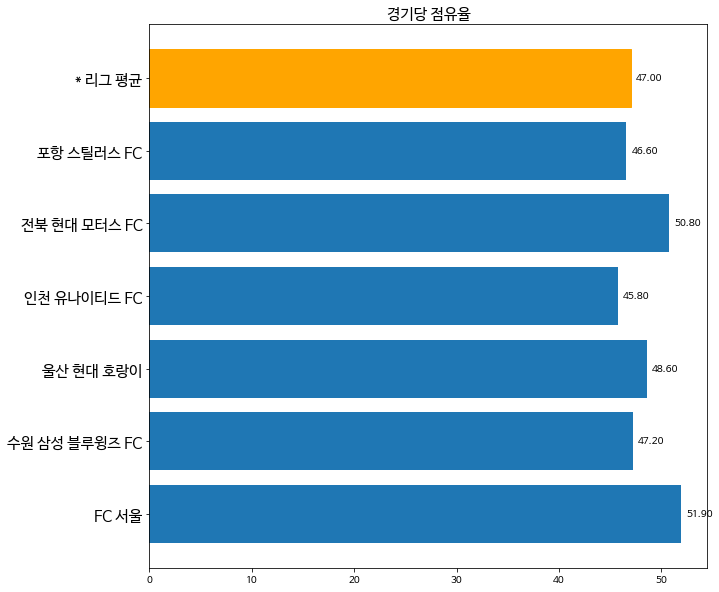

In [167]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('경기당 점유율')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [168]:
x = TEAMS_TOP6['korean_name']
y = TEAMS_TOP6['shots_on_target_ratio']

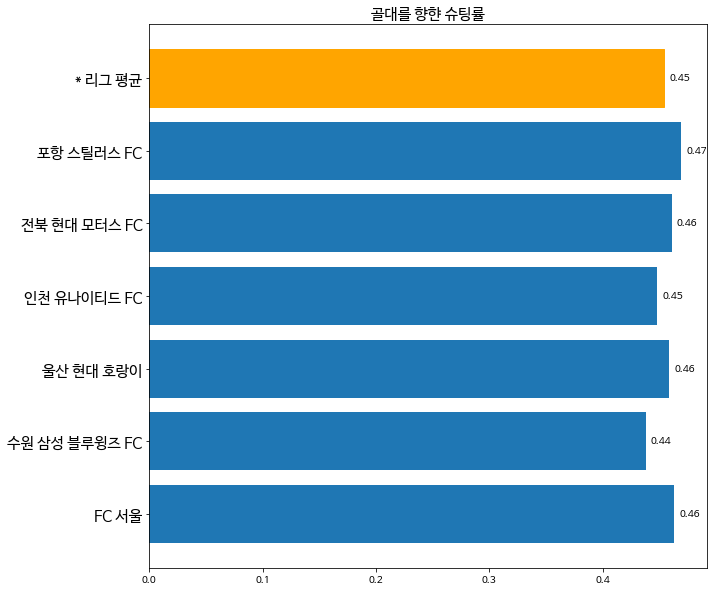

In [169]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('골대를 향햔 슈팅률')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [170]:
x = PLAYERS_TOP6['korean_name']
y0 = PLAYERS_TOP6['rank_in_league_top_attackers']
y1 = PLAYERS_TOP6['rank_in_league_top_midfielders']
y2 = PLAYERS_TOP6['rank_in_league_top_defenders']

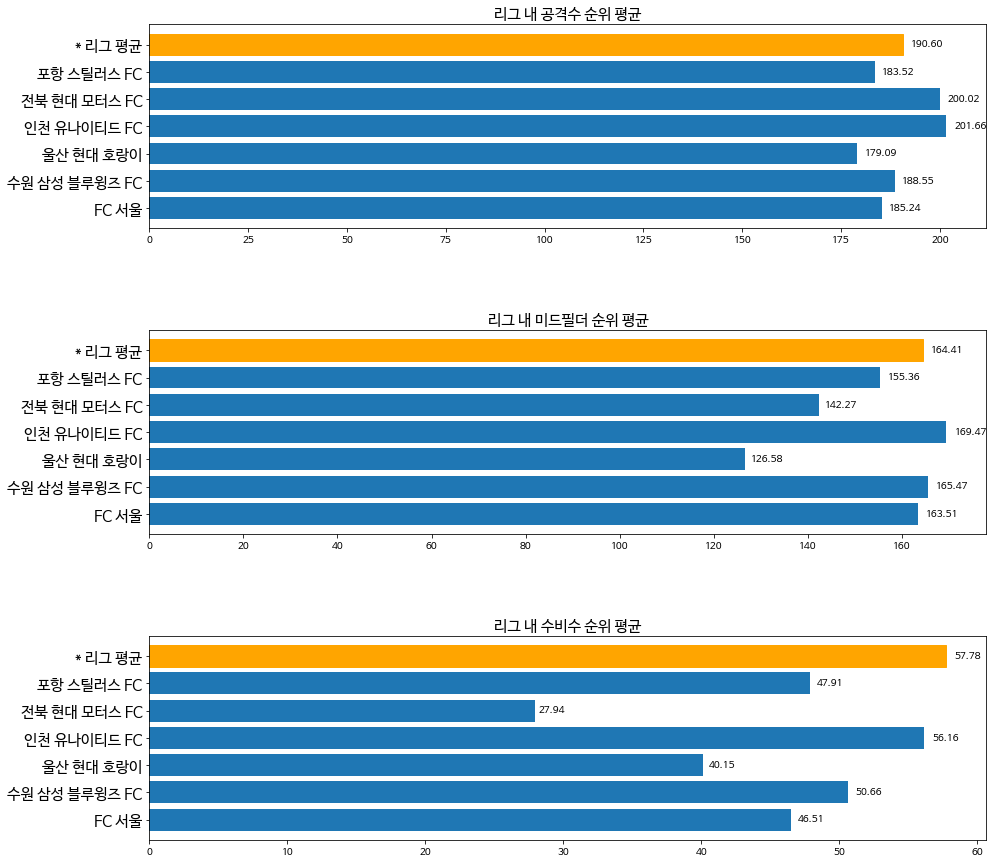

In [171]:
fig, ax = plt.subplots(3,1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

ax[0].title.set_text('리그 내 공격수 순위 평균')
ax[0].title.set_size(15)
ax[0].tick_params (axis = 'y', labelsize =15)
bars = ax[0].barh(x, y0)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[0].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[0].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[1].title.set_text('리그 내 미드필더 순위 평균')
ax[1].title.set_size(15)
ax[1].tick_params (axis = 'y', labelsize =15)
bars = ax[1].barh(x, y1)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[1].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[1].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

ax[2].title.set_text('리그 내 수비수 순위 평균')
ax[2].title.set_size(15)
ax[2].tick_params (axis = 'y', labelsize =15)
bars = ax[2].barh(x, y2)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax[2].patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax[2].text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [172]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'average_possession'][6]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'shots_on_target_ratio'][6]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'rank_in_league_top_attackers'][6]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'rank_in_league_top_midfielders'][6]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'rank_in_league_top_defenders'][6]
technical = 100 / ( t1 + t2 - t3 - t4 - t5 )
technical

-0.27372476850410343

In [173]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'average_possession'][0]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'shots_on_target_ratio'][0]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == 'FC 서울', 'rank_in_league_top_attackers'][0]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == 'FC 서울', 'rank_in_league_top_midfielders'][0]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == 'FC 서울', 'rank_in_league_top_defenders'][0]
FC_Seoul_Tech = ( t1 + t2 - t3 - t4 - t5 ) * technical
FC_Seoul_Tech

93.8574891702608

In [174]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'average_possession'][1]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'shots_on_target_ratio'][1]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'rank_in_league_top_attackers'][1]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'rank_in_league_top_midfielders'][1]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'rank_in_league_top_defenders'][1]
Suwon_Bluewings_Tech = ( t1 + t2 - t3 - t4 - t5 ) * technical
Suwon_Bluewings_Tech

97.73103221151115

In [175]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'average_possession'][2]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'shots_on_target_ratio'][2]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '울산 현대 호랑이', 'rank_in_league_top_attackers'][2]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '울산 현대 호랑이', 'rank_in_league_top_midfielders'][2]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '울산 현대 호랑이', 'rank_in_league_top_defenders'][2]
Ulsan_Tech = ( t1 + t2 - t3 - t4 - t5 ) * technical
Ulsan_Tech

81.23007077400526

In [176]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'average_possession'][3]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'shots_on_target_ratio'][3]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '인천 유나이티드 FC', 'rank_in_league_top_attackers'][3]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '인천 유나이티드 FC', 'rank_in_league_top_midfielders'][3]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '인천 유나이티드 FC', 'rank_in_league_top_defenders'][3]
Incheon_United_Tech = ( t1 + t2 - t3 - t4 - t5 ) * technical
Incheon_United_Tech

104.30225324407256

In [177]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'average_possession'][4]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'shots_on_target_ratio'][4]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'rank_in_league_top_attackers'][4]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'rank_in_league_top_midfielders'][4]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'rank_in_league_top_defenders'][4]
Jeonbuk_Motors_Tech = ( t1 + t2 - t3 - t4 - t5 ) * technical
Jeonbuk_Motors_Tech

87.30971568498536

In [178]:
t1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'average_possession'][5]
t2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'shots_on_target_ratio'][5]
t3 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '포항 스틸러스 FC', 'rank_in_league_top_attackers'][5]
t4 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '포항 스틸러스 FC', 'rank_in_league_top_midfielders'][5]
t5 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '포항 스틸러스 FC', 'rank_in_league_top_defenders'][5]
Pohang_Steelers_Tech = ( t1 + t2 - t3 - t4 - t5 ) * technical
Pohang_Steelers_Tech

92.99065640839349

### 01.4 Physical
1. 평균 나이 : *age*
2. 평균 경기 출전 시간 : *min_per_match*

In [179]:
x = PLAYERS_TOP6['korean_name']
y = PLAYERS_TOP6['age']

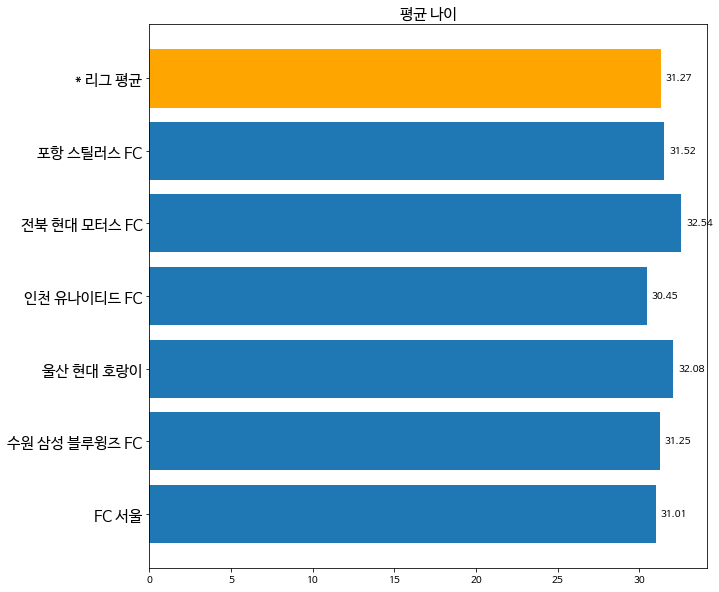

In [180]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('평균 나이')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [181]:
x = PLAYERS_TOP6['korean_name']
y = PLAYERS_TOP6['min_per_match']

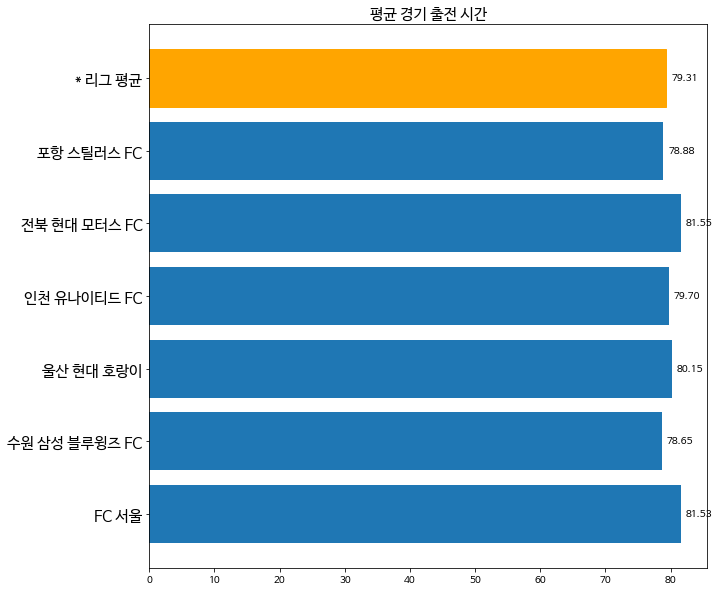

In [182]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('평균 경기 출전 시간')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [183]:
p1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'age'][6]
p2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '* 리그 평균', 'min_per_match'][6]
physical = 100 / ( - p1 + p2 )

In [184]:
m1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == 'FC 서울', 'age'][0]
m2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == 'FC 서울', 'min_per_match'][0]
FC_Seoul_Phy = ( - p1 + p2 ) * physical
FC_Seoul_Phy

100.0

In [185]:
m1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'age'][1]
m2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'min_per_match'][1]
Suwon_Bluewings_Phy = ( - p1 + p2 ) * physical
Suwon_Bluewings_Phy

100.0

In [186]:
m1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '울산 현대 호랑이', 'age'][2]
m2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '울산 현대 호랑이', 'min_per_match'][2]
Ulsan_Phy = ( - p1 + p2 ) * physical
Ulsan_Phy

100.0

In [187]:
m1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '인천 유나이티드 FC', 'age'][3]
m2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '인천 유나이티드 FC', 'min_per_match'][3]
Incheon_United_Phy = ( - p1 + p2 ) * physical
Incheon_United_Phy

100.0

In [188]:
m1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'age'][4]
m2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'min_per_match'][4]
Jeonbuk_Motors_Phy = ( - p1 + p2 ) * physical
Jeonbuk_Motors_Phy

100.0

In [189]:
m1 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '포항 스틸러스 FC', 'age'][5]
m2 = PLAYERS_TOP6.loc[PLAYERS_TOP6['korean_name'] == '포항 스틸러스 FC', 'min_per_match'][5]
Pohang_Steelers_Phy = ( - p1 + p2 ) * physical
Pohang_Steelers_Phy

100.0

### 01.5 Mental
1. 전반은 지고 후반에 역전한 경기 비율 : *comeback_ratio*
2. 역배당 경기를 승리한 경기 비율 : *unfav_win_ratio*
3. 경기당 파울 : *fouls_per_match*

In [190]:
MATCHES_TOP6_FC_Seoul = MATCHES_TOP6[(MATCHES_TOP6['home_team_name_kor']=='FC 서울')|\
                                     (MATCHES_TOP6['away_team_name_kor']=='FC 서울')]
MATCHES_TOP6_Pohang_Steelers = MATCHES_TOP6[(MATCHES_TOP6['home_team_name_kor']=='포항 스틸러스 FC')|\
                                            (MATCHES_TOP6['away_team_name_kor']=='포항 스틸러스 FC	')]
MATCHES_TOP6_Ulsan = MATCHES_TOP6[(MATCHES_TOP6['home_team_name_kor']=='울산 현대 호랑이')|\
                                  (MATCHES_TOP6['away_team_name_kor']=='울산 현대 호랑이')]
MATCHES_TOP6_Jeonbuk_Motors = MATCHES_TOP6[(MATCHES_TOP6['home_team_name_kor']=='전북 현대 모터스 FC')|\
                                           (MATCHES_TOP6['away_team_name_kor']=='전북 현대 모터스 FC')]
MATCHES_TOP6_Incheon_United = MATCHES_TOP6[(MATCHES_TOP6['home_team_name_kor']=='인천 유나이티드 FC')|\
                                           (MATCHES_TOP6['away_team_name_kor']=='인천 유나이티드 FC')]
MATCHES_TOP6_Suwon_Bluewings = MATCHES_TOP6[(MATCHES_TOP6['home_team_name_kor']=='수원 삼성 블루윙즈 FC')|\
                                            (MATCHES_TOP6['away_team_name_kor']=='수원 삼성 블루윙즈 FC')]

In [191]:
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'comeback_count'] = MATCHES_TOP6_FC_Seoul['comeback'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'comeback_count'] = MATCHES_TOP6_Pohang_Steelers['comeback'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'comeback_count'] = MATCHES_TOP6_Ulsan['comeback'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'comeback_count'] = MATCHES_TOP6_Jeonbuk_Motors['comeback'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'comeback_count'] = MATCHES_TOP6_Incheon_United['comeback'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'comeback_count'] = MATCHES_TOP6_Suwon_Bluewings['comeback'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'comeback_count'] = MATCHES['comeback'].value_counts()[1]
TEAMS_TOP6

,korean_name,goals_scored_per_match,xg_for_avg_overall,shots_per_match,corners_per_match,goals_conceded_per_match,xg_against_avg_overall,clean_sheet_percentage,average_possession,shots_on_target_ratio,fouls_per_match,matches_played,comeback_count
0,FC 서울,1.283000,0.701000,7.725000,4.402000,1.182000,0.710000,28.500000,51.9,0.463000,5.341000,345.0,21.0
1,수원 삼성 블루윙즈 FC,1.290000,0.654000,8.173000,4.172000,1.207000,0.696000,29.900000,47.2,0.438000,6.821000,345.0,19.0
2,울산 현대 호랑이,1.523000,0.783000,8.273000,4.748000,1.051000,0.693000,32.800000,48.6,0.459000,6.138000,345.0,18.0
3,인천 유나이티드 FC,1.041000,0.595000,7.138000,3.885000,1.278000,0.808000,28.300000,45.8,0.448000,6.077000,345.0,15.0
4,전북 현대 모터스 FC,1.701000,0.907000,9.973000,4.601000,0.892000,0.637000,40.500000,50.8,0.461000,7.221000,345.0,14.0
5,포항 스틸러스 FC,1.392000,0.726000,8.625000,4.775000,1.151000,0.721000,32.100000,46.6,0.469000,7.330000,345.0,12.0
6,* 리그 평균,1.265328,0.693115,7.777869,4.409344,1.265246,0.713279,28.336066,47.0,0.454098,5.928115,4216.0,111.0


In [192]:
TEAMS_TOP6['comeback_ratio'] = round((TEAMS_TOP6['comeback_count'] / TEAMS_TOP6['matches_played'] * 100), 2)

In [193]:
x = TEAMS_TOP6['korean_name']
y = TEAMS_TOP6['comeback_ratio']

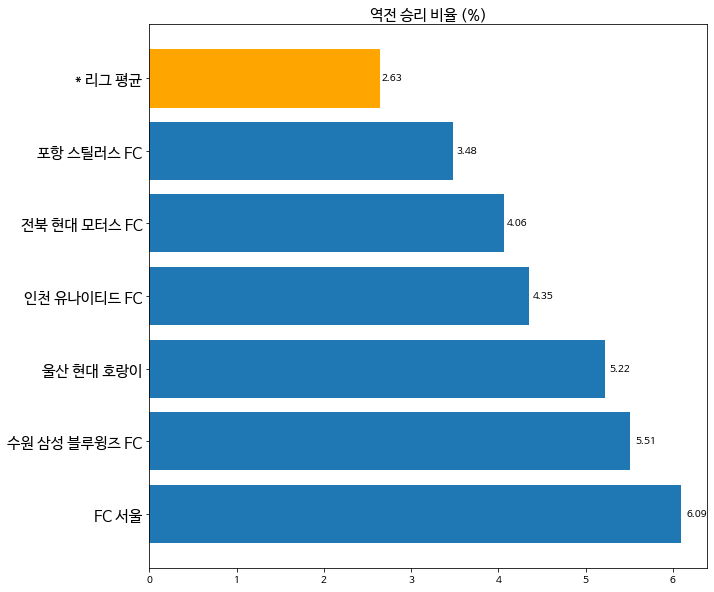

In [194]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('역전 승리 비율 (%)')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [195]:
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'unfav_win_count'] = MATCHES_TOP6_FC_Seoul['unfav_win'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'unfav_win_count'] = MATCHES_TOP6_Pohang_Steelers['unfav_win'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'unfav_win_count'] = MATCHES_TOP6_Ulsan['unfav_win'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'unfav_win_count'] = MATCHES_TOP6_Jeonbuk_Motors['unfav_win'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'unfav_win_count'] = MATCHES_TOP6_Incheon_United['unfav_win'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'unfav_win_count'] = MATCHES_TOP6_Suwon_Bluewings['unfav_win'].value_counts()[1]
TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'unfav_win_count'] = MATCHES['unfav_win'].value_counts()[1]
TEAMS_TOP6

,korean_name,goals_scored_per_match,xg_for_avg_overall,shots_per_match,corners_per_match,goals_conceded_per_match,xg_against_avg_overall,clean_sheet_percentage,average_possession,shots_on_target_ratio,fouls_per_match,matches_played,comeback_count,comeback_ratio,unfav_win_count
0,FC 서울,1.283000,0.701000,7.725000,4.402000,1.182000,0.710000,28.500000,51.9,0.463000,5.341000,345.0,21.0,6.09,40.0
1,수원 삼성 블루윙즈 FC,1.290000,0.654000,8.173000,4.172000,1.207000,0.696000,29.900000,47.2,0.438000,6.821000,345.0,19.0,5.51,43.0
2,울산 현대 호랑이,1.523000,0.783000,8.273000,4.748000,1.051000,0.693000,32.800000,48.6,0.459000,6.138000,345.0,18.0,5.22,18.0
3,인천 유나이티드 FC,1.041000,0.595000,7.138000,3.885000,1.278000,0.808000,28.300000,45.8,0.448000,6.077000,345.0,15.0,4.35,37.0
4,전북 현대 모터스 FC,1.701000,0.907000,9.973000,4.601000,0.892000,0.637000,40.500000,50.8,0.461000,7.221000,345.0,14.0,4.06,19.0
5,포항 스틸러스 FC,1.392000,0.726000,8.625000,4.775000,1.151000,0.721000,32.100000,46.6,0.469000,7.330000,345.0,12.0,3.48,22.0
6,* 리그 평균,1.265328,0.693115,7.777869,4.409344,1.265246,0.713279,28.336066,47.0,0.454098,5.928115,4216.0,111.0,2.63,221.0


In [196]:
TEAMS_TOP6['unfav_win_ratio'] = round((TEAMS_TOP6['unfav_win_count'] / TEAMS_TOP6['matches_played'] * 100), 2)

In [197]:
x = TEAMS_TOP6['korean_name']
y = TEAMS_TOP6['unfav_win_ratio']

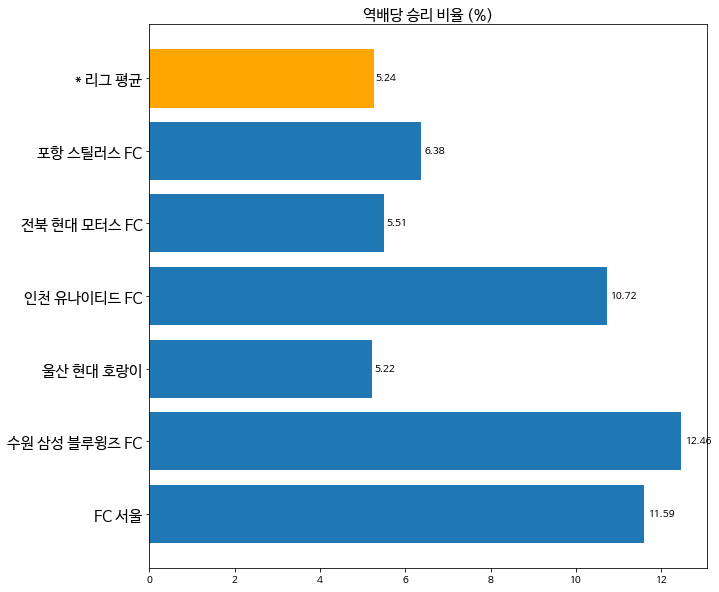

In [198]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('역배당 승리 비율 (%)')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [199]:
x = TEAMS_TOP6['korean_name']
y = TEAMS_TOP6['fouls_per_match']

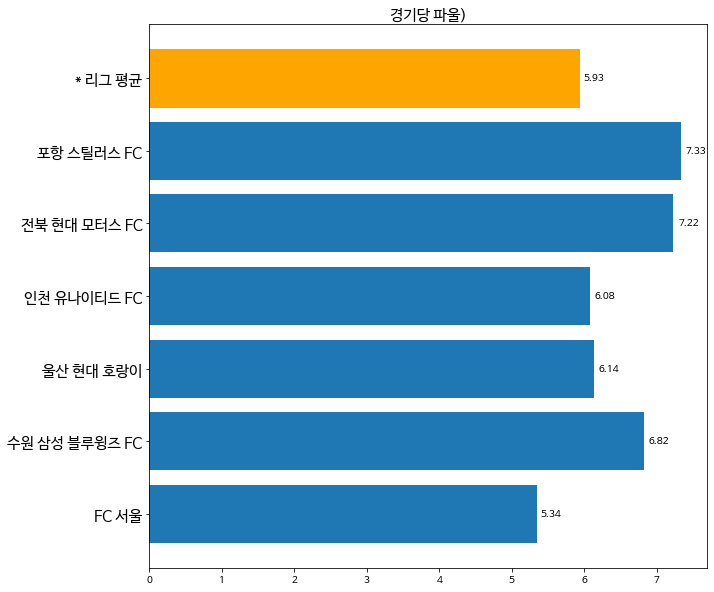

In [200]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.title.set_text('경기당 파울)')
ax.title.set_size(15)
ax.tick_params (axis = 'y', labelsize =15)
bars = ax.barh(x, y)
for index, team in enumerate(x):
  if team == '* 리그 평균':
    bars[index].set_color('orange')
    break
for p in ax.patches:
    xpos, ypos, width, height = p.get_bbox().bounds
    ax.text(width*1.01, ypos+height/2, "%.2f"%(width), va='center')

plt.show()

In [201]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'comeback_ratio'][6]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'unfav_win_ratio'][6]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '* 리그 평균', 'fouls_per_match'][6]
mental = 100 / ( m1 + m2 + m3 )

In [202]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'comeback_ratio'][0]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'unfav_win_ratio'][0]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == 'FC 서울', 'fouls_per_match'][0]
FC_Seoul_Men = ( m1 + m2 + m3 ) * mental
FC_Seoul_Men

166.8416331525452

In [203]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'comeback_ratio'][1]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'unfav_win_ratio'][1]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '수원 삼성 블루윙즈 FC', 'fouls_per_match'][1]
Suwon_Bluewings_Men = ( m1 + m2 + m3 ) * mental
Suwon_Bluewings_Men

179.66947254614257

In [204]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'comeback_ratio'][2]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'unfav_win_ratio'][2]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '울산 현대 호랑이', 'fouls_per_match'][2]
Ulsan_Men = ( m1 + m2 + m3 ) * mental
Ulsan_Men

120.14684828647296

In [205]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'comeback_ratio'][3]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'unfav_win_ratio'][3]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '인천 유나이티드 FC', 'fouls_per_match'][3]
Incheon_United_Men = ( m1 + m2 + m3 ) * mental
Incheon_United_Men

153.26006760248785

In [206]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'comeback_ratio'][4]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'unfav_win_ratio'][4]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '전북 현대 모터스 FC', 'fouls_per_match'][4]
Jeonbuk_Motors_Men = ( m1 + m2 + m3 ) * mental
Jeonbuk_Motors_Men

121.69053743383807

In [207]:
m1 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'comeback_ratio'][5]
m2 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'unfav_win_ratio'][5]
m3 = TEAMS_TOP6.loc[TEAMS_TOP6['korean_name'] == '포항 스틸러스 FC', 'fouls_per_match'][5]
Pohang_Steelers_Men = ( m1 + m2 + m3 ) * mental
Pohang_Steelers_Men

124.58223682256424



*   Team Attribute 시각화



In [208]:
FC_Seoul = [FC_Seoul_Att, FC_Seoul_Def, FC_Seoul_Tech, FC_Seoul_Phy, FC_Seoul_Men]
Suwon_Bluewings = [Suwon_Bluewings_Att, Suwon_Bluewings_Def, Suwon_Bluewings_Tech, Suwon_Bluewings_Phy, Suwon_Bluewings_Men]
Ulsan = [Ulsan_Att, Ulsan_Def, Ulsan_Tech, Ulsan_Phy, Ulsan_Men]
Incheon_United = [Incheon_United_Att, Incheon_United_Def, Incheon_United_Tech, Incheon_United_Phy, Incheon_United_Men]
Jeonbuk_Motors = [Jeonbuk_Motors_Att, Jeonbuk_Motors_Def, Jeonbuk_Motors_Tech, Jeonbuk_Motors_Phy, Jeonbuk_Motors_Men]
Pohang_Steelers = [Pohang_Steelers_Att, Pohang_Steelers_Def, Pohang_Steelers_Tech, Pohang_Steelers_Phy, Pohang_Steelers_Men]

In [209]:
categories = ['Attacking','Defending','Technical', 'Physical', 'Mental']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = FC_Seoul,
      theta=categories,
      fill='toself',
      name='FC Seoul'
))
fig.add_trace(go.Scatterpolar(
      r=Suwon_Bluewings,
      theta=categories,
      fill='toself',
      name='Suwon Bluewings'
))
fig.add_trace(go.Scatterpolar(
      r=Ulsan,
      theta=categories,
      fill='toself',
      name='Ulsan'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 200]
    )),
  showlegend=False
)

fig.show()

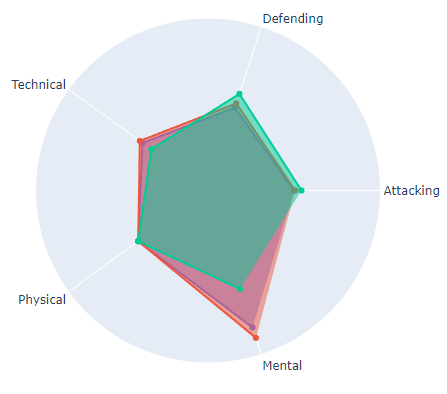

In [210]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r = Incheon_United,
      theta=categories,
      fill='toself',
      name='Incheon United'
))
fig.add_trace(go.Scatterpolar(
      r=Jeonbuk_Motors,
      theta=categories,
      fill='toself',
      name='Jeonbuk Motors'
))
fig.add_trace(go.Scatterpolar(
      r=Pohang_Steelers,
      theta=categories,
      fill='toself',
      name='PohangSteelers'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 200]
    )),
  showlegend=False
)

fig.show()

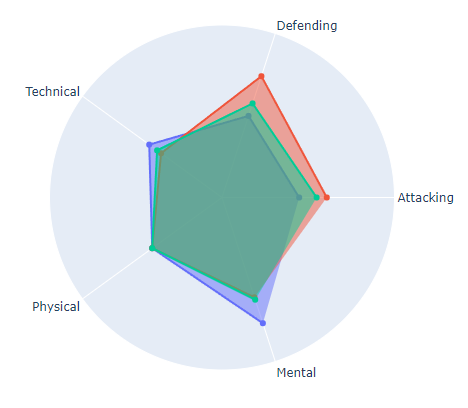

## 02. Matches

### 02.1 구단별 경기장 승리 횟수

In [211]:
all_csv = all_csv.replace('Changwon Football Center', 'Changwon Football Center (Changwon)')
all_csv = all_csv.replace('Chuncheon Songam Stadium', 'Chuncheon Songam Stadium (Chuncheon)')
all_csv = all_csv.replace('Busan Gudeok Stadium (Busan)','Busan Asiad Main Stadium (Busan)')
all_csv = all_csv.replace('Chuncheon Songam Stadium', 'Chuncheon Songam Stadium (Chuncheon)')
all_csv = all_csv.replace('DGB Arena (Daegu)', 'DGB Daegu Bank Park (Daegu)')
all_csv = all_csv.replace('Daegu Civil Stadium (Daegu)', 'DGB Daegu Bank Park (Daegu)')
all_csv = all_csv.replace('Daegu Stadium', 'DGB Daegu Bank Park (Daegu)')
all_csv = all_csv.replace('Gangneung Stadium', 'Gangneung Stadium (Gangneung)')
all_csv = all_csv.replace('Gwangju World Cup Stadium','Gwangju Football Stadium (Gwangju)')
all_csv = all_csv.replace('Gwangju World Cup Stadium (Gwangju)', 'Gwangju Football Stadium (Gwangju)')
all_csv = all_csv.replace('Jeju Complex Stadium (Jeju)', 'Jeju World Cup Stadium (Seogwipo)')
all_csv = all_csv.replace('Jeju World Cup Stadium', 'Jeju World Cup Stadium (Seogwipo)')
all_csv = all_csv.replace('Jeonju World Cup Stadium', 'Jeonju World Cup Stadium (Jeonju)')
all_csv = all_csv.replace('Jeonju Civil Stadium (Jeonju)', 'Jeonju World Cup Stadium (Jeonju)')
all_csv = all_csv.replace('Sangju Stadium', 'Sangju Stadium (Sangju)')
all_csv = all_csv.replace('Seongnam Tancheon Sports Complex', 'Seongnam Tancheon Sports Complex (Seongnam)')
all_csv = all_csv.replace('Ulsan Munsu Football Stadium', 'Ulsan Munsu Football Stadium (Ulsan)')
all_csv = all_csv.replace('Ulsan Sports Complex Stadium', 'Ulsan Munsu Football Stadium (Ulsan)')
all_csv = all_csv.replace('Ulsan Stadium (Ulsan)', 'Ulsan Munsu Football Stadium (Ulsan)')
all_csv = all_csv.replace('Ulsan Sports Complex Stadium (Ulsan)', 'Ulsan Munsu Football Stadium (Ulsan)')
all_csv = all_csv.replace('Seoul World Cup Stadium', 'Seoul World Cup Stadium (Seoul)')
all_csv = all_csv.replace('Seoul World Cup Stadium (Seoul)', 'Seoul Olympic Stadium (Seoul)')
all_csv = all_csv.replace('Yangsan Stadium (Yangsan)', 'Changwon Football Center (Changwon)')
all_csv = all_csv.replace('Jinju Stadium (Jinju)','Changwon Football Center (Changwon)')
all_csv = all_csv.replace('Milyang Public Stadium (Miryang)','Changwon Football Center (Changwon)')
all_csv = all_csv.replace('Alpensia Ski Jumping Stadium (Pyeongchang)','Gangneung Stadium (Gangneung)')
all_csv = all_csv.replace('Chuncheon Songam Stadium (Chuncheon)','Gangneung Stadium (Gangneung)')
all_csv = all_csv.replace('Steelyard Stadium','Steelyard Stadium (Pohang)')
all_csv = all_csv.replace('Suwon World Cup Stadium','Suwon World Cup Stadium (Suwon)')
all_csv = all_csv.replace('Suwon Civil Stadium','Suwon Sports Complex (Suwon)')
all_csv = all_csv.replace('Sungui Arena Park', 'Sungui Arena Park (Incheon)')
all_csv = all_csv.replace('Mokpo International Football Center Main (Grass Ground A) (Mokpo)', 'Gwangju Football Stadium (Gwangju)')
all_csv = all_csv.replace('Suncheon Palma Stadium (Suncheon)', 'Gwangyang Stadium (Gwangyang)')
all_csv = all_csv.replace('Gwangyang Stadium', 'Gwangyang Stadium (Gwangyang)')
all_csv = all_csv.replace('Gimcheon Stadium (Gimcheon)', 'Sangju Stadium (Sangju)')
all_csv = all_csv.replace('Daejeon World Cup Stadium', 'Daejeon World Cup Stadium(Daejeon)')
all_csv = all_csv.replace('Seongnam Tancheon Sports Complex (Seongnam)', 'Tancheon Sports Complex (Seongnam)')

In [212]:
stadium = all_csv['stadium_name'].value_counts().sort_index()

In [213]:
popular_stadium = stadium[stadium>10]

In [214]:
Home_team = all_csv['home_team_name'].value_counts().sort_index()

In [215]:
popular_Home_team = Home_team[Home_team>180]

In [216]:
all_csv['Winner_Home'] = all_csv['home_team_goal_count'] > all_csv['away_team_goal_count']
all_csv['Winner_Away'] = all_csv['away_team_goal_count'] > all_csv['home_team_goal_count']
all_csv['Winner_None'] = all_csv['away_team_goal_count'] == all_csv['home_team_goal_count']

for i in all_csv[all_csv['Winner_None'] == True].index:
  all_csv.at[i,'Winner'] = '(Draw)'
for i in all_csv[all_csv['Winner_Home'] == True].index:
  all_csv.at[i,'Winner'] = all_csv.at[i,'home_team_name']
for i in all_csv[all_csv['Winner_Away'] == True].index:
  all_csv.at[i,'Winner'] = all_csv.at[i,'away_team_name']

In [217]:
soccer = {'team_name': ['FC Seoul', 'Incheon United', 'Suwon Bluewings', 'Ulsan', 'Pohang Steelers', 'Jeonbuk Motors', 'else'],
          'Busan Asiad Main Stadium (Busan)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Changwon Football Center (Changwon)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'DGB Daegu Bank Park (Daegu)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Daejeon World Cup Stadium(Daejeon)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Gangneung Stadium (Gangneung)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Gwangju Football Stadium (Gwangju)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Gwangyang Stadium (Gwangyang)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Jeju World Cup Stadium (Seogwipo)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Jeonju World Cup Stadium (Jeonju)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Sangju Stadium (Sangju)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Seoul Olympic Stadium (Seoul)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Steelyard Stadium (Pohang)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Sungui Arena Park (Incheon)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Suwon Sports Complex (Suwon)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Suwon World Cup Stadium (Suwon)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Tancheon Sports Complex (Seongnam)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]], 
          'Ulsan Munsu Football Stadium (Ulsan)': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]],
          'else stadium': [[0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0], [0,0,0]]}

In [218]:
df = pd.DataFrame(soccer, columns = ['team_name', 'Busan Asiad Main Stadium (Busan)', 'Changwon Football Center (Changwon)', 'DGB Daegu Bank Park (Daegu)', 
                                     'Gangneung Stadium (Gangneung)', 'Gwangju Football Stadium (Gwangju)', 'Gwangyang Stadium (Gwangyang)', 'Jeju World Cup Stadium (Seogwipo)', 
                                     'Jeonju World Cup Stadium (Jeonju)', 'Sangju Stadium (Sangju)', 'Seoul Olympic Stadium (Seoul)', 'Steelyard Stadium (Pohang)', 'Sungui Arena Park (Incheon)', 
                                     'Suwon Sports Complex (Suwon)', 'Suwon World Cup Stadium (Suwon)', 'Tancheon Sports Complex (Seongnam)', 'Ulsan Munsu Football Stadium (Ulsan)', 'else stadium'])

In [219]:
team_name = ['FC Seoul', 'Incheon United', 'Suwon Bluewings', 'Ulsan', 'Pohang Steelers', 'Jeonbuk Motors', 'else']

In [220]:
stadium = ['Busan Asiad Main Stadium (Busan)', 'Changwon Football Center (Changwon)', 'DGB Daegu Bank Park (Daegu)', 'Gangneung Stadium (Gangneung)', 
           'Gwangju Football Stadium (Gwangju)', 'Gwangyang Stadium (Gwangyang)', 'Jeju World Cup Stadium (Seogwipo)', 'Jeonju World Cup Stadium (Jeonju)', 
          'Sangju Stadium (Sangju)', 'Seoul Olympic Stadium (Seoul)', 'Steelyard Stadium (Pohang)', 'Sungui Arena Park (Incheon)', 'Suwon Sports Complex (Suwon)', 
           'Suwon World Cup Stadium (Suwon)', 'Tancheon Sports Complex (Seongnam)', 'Ulsan Munsu Football Stadium (Ulsan)','else stadium']

In [221]:
for idx, row in all_csv.iterrows():
  if row['home_team_name'] not in team_name:
    hn = 'else'
  else:
    hn = row['home_team_name']
  
  if row['away_team_name'] not in team_name:
    an = 'else'
  else:
    an = row['away_team_name']

  if row['stadium_name'] not in stadium:
    sn = 'else stadium'
  else:
    sn = row['stadium_name']

  # home team 이길 때
  if row['home_team_goal_count'] > row['away_team_goal_count']:
    df.loc[team_name.index(hn), sn][0] += 1
    df.loc[team_name.index(an), sn][2] += 1
  
  # away tema 이길 때
  elif row['home_team_goal_count'] < row['away_team_goal_count']:
    df.loc[team_name.index(hn), sn][2] += 1
    df.loc[team_name.index(an), sn][0] += 1

  # 비길 때
  else :
    df.loc[team_name.index(hn), sn][1] += 1
    df.loc[team_name.index(an), sn][1] += 1


In [222]:
for i in range(df.shape[0]-1):
  for j in range(1,df.shape[1]-1):
    df.iloc[i,j] = round(df.iloc[i,j][0]/(df.iloc[i,j][0]+df.iloc[i,j][1]+df.iloc[i,j][2])*100,2)

In [223]:
df.set_index('team_name'), ('Busan Asiad Main Stadium (Busan)'), ('Changwon Football Center (Changwon)'), ('DGB Daegu Bank Park (Daegu)'), ('Daejeon World Cup Stadium(Daejeon)'), 
('Gangneung Stadium (Gangneung)'), ('Gwangju Football Stadium (Gwangju)'), ('Gwangyang Stadium (Gwangyang)'), ('Jeju World Cup Stadium (Seogwipo)'), ('Jeonju World Cup Stadium (Jeonju)'), 
('Sangju Stadium (Sangju)'), ('Seoul Olympic Stadium (Seoul)'), ('Steelyard Stadium (Pohang)'), ('Sungui Arena Park (Incheon)'), ('Suwon Sports Complex (Suwon)'), 
('Suwon World Cup Stadium (Suwon)'), ('Tancheon Sports Complex (Seongnam)'), ('Ulsan Munsu Football Stadium (Ulsan)'), ('else stadium'), ('FC Seoul'), ('Incheon United	'), ('Suwon Bluewings	'), ('Ulsan'), ('Pohang Steelers'), ('Jeonbuk Motors'), ('else') 

('Suwon World Cup Stadium (Suwon)',
 'Tancheon Sports Complex (Seongnam)',
 'Ulsan Munsu Football Stadium (Ulsan)',
 'else stadium',
 'FC Seoul',
 'Incheon United\t',
 'Suwon Bluewings\t',
 'Ulsan',
 'Pohang Steelers',
 'Jeonbuk Motors',
 'else')

In [224]:
df = df.drop([6], axis = 0)
df = df.drop(['else stadium'], axis = 1)

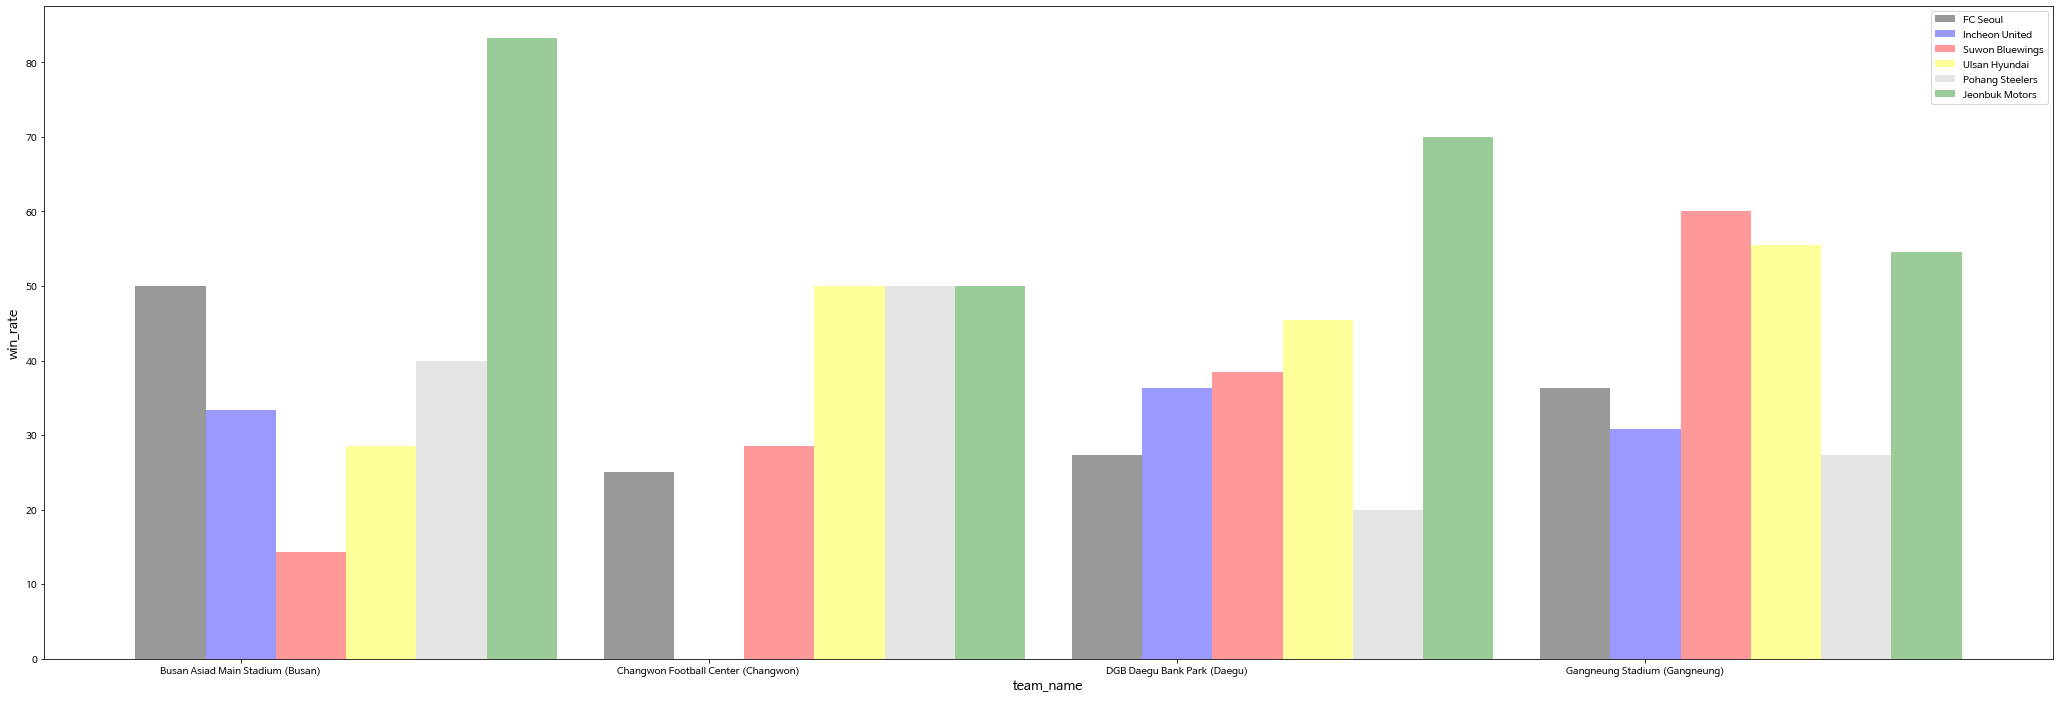

In [225]:
#1

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(36,12))
bar_width = 0.15

# 구장 갯수 선택
index = np.arange(4)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df.iloc[0, 1:5], bar_width, alpha=0.4, color='Black', label='FC Seoul')

b2 = plt.bar(index + bar_width, df.iloc[1, 1:5], bar_width, alpha=0.4, color='Blue', label='Incheon United')

b3 = plt.bar(index + 2 * bar_width, df.iloc[2, 1:5], bar_width, alpha=0.4, color='Red', label='Suwon Bluewings')

b4 = plt.bar(index + 3 * bar_width, df.iloc[3, 1:5], bar_width, alpha=0.4, color='Yellow', label='Ulsan Hyundai')

b5 = plt.bar(index + 4 * bar_width, df.iloc[4, 1:5], bar_width, alpha=0.4, color='Silver', label='Pohang Steelers')

b6 = plt.bar(index + 5 * bar_width, df.iloc[5, 1:5], bar_width, alpha=0.4, color='Green', label='Jeonbuk Motors')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 team_name 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), stadium)

# x축, y축 이름 및 범례 설정
plt.xlabel('team_name', size = 13)
plt.ylabel('win_rate', size = 13)
plt.legend()
plt.show()

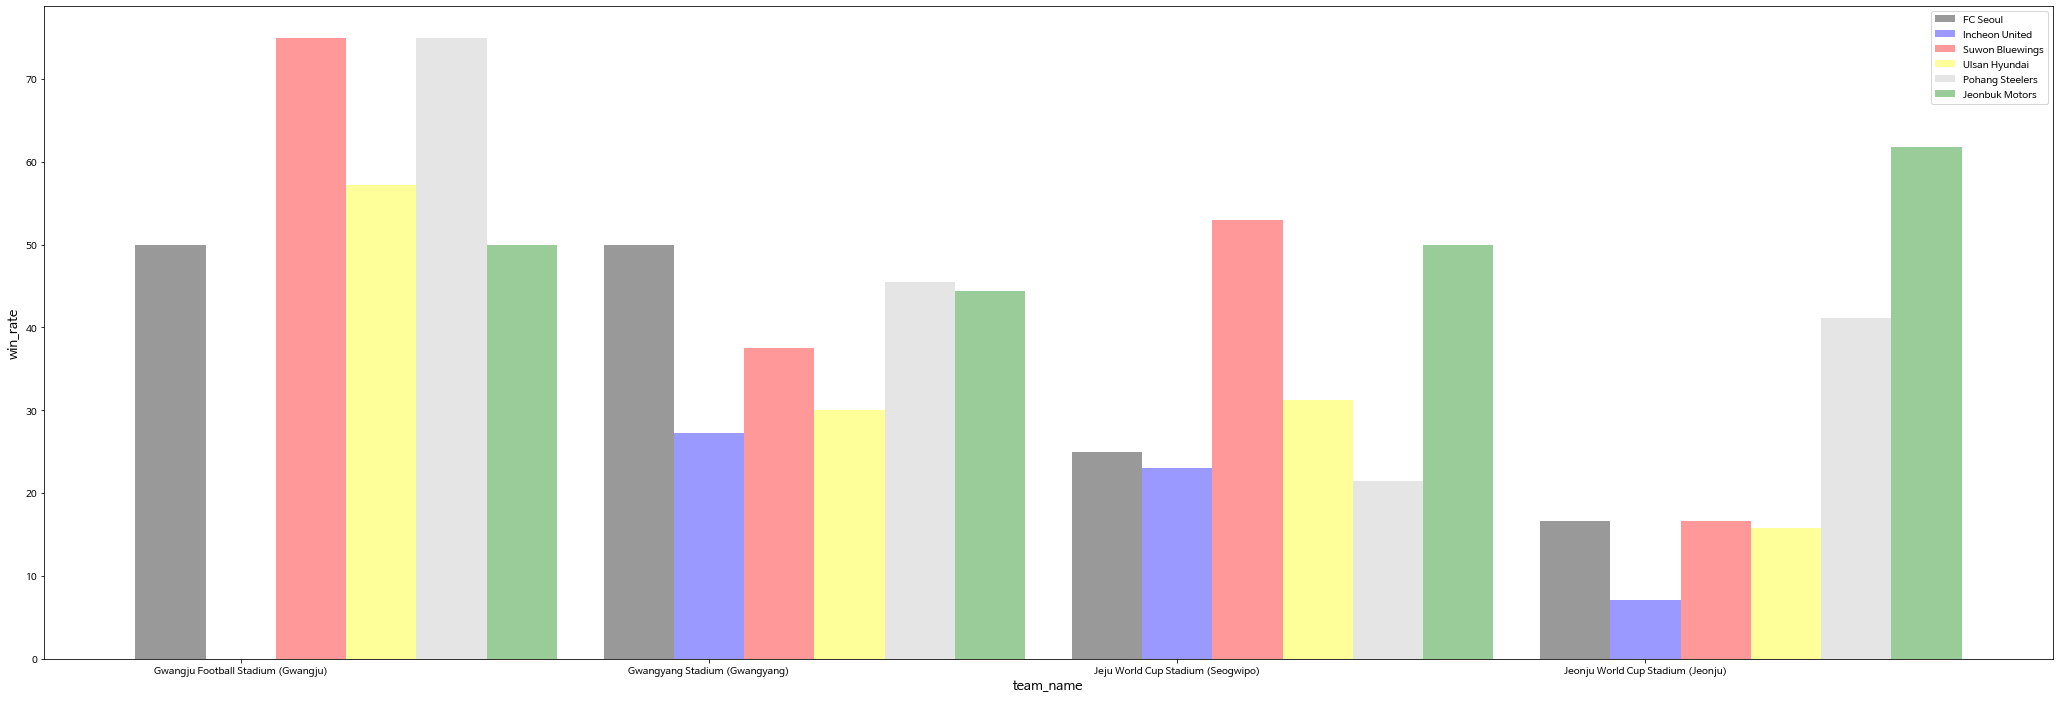

In [226]:
#2

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(36,12))
bar_width = 0.15

# 구장 갯수 선택
index = np.arange(4)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df.iloc[0, 5:9], bar_width, alpha=0.4, color='Black', label='FC Seoul')

b2 = plt.bar(index + bar_width, df.iloc[1, 5:9], bar_width, alpha=0.4, color='Blue', label='Incheon United')

b3 = plt.bar(index + 2 * bar_width, df.iloc[2, 5:9], bar_width, alpha=0.4, color='Red', label='Suwon Bluewings')

b4 = plt.bar(index + 3 * bar_width, df.iloc[3, 5:9], bar_width, alpha=0.4, color='Yellow', label='Ulsan Hyundai')

b5 = plt.bar(index + 4 * bar_width, df.iloc[4, 5:9], bar_width, alpha=0.4, color='Silver', label='Pohang Steelers')

b6 = plt.bar(index + 5 * bar_width, df.iloc[5, 5:9], bar_width, alpha=0.4, color='Green', label='Jeonbuk Motors')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 team_name 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), stadium[4:8])

# x축, y축 이름 및 범례 설정
plt.xlabel('team_name', size = 13)
plt.ylabel('win_rate', size = 13)
plt.legend()
plt.show()

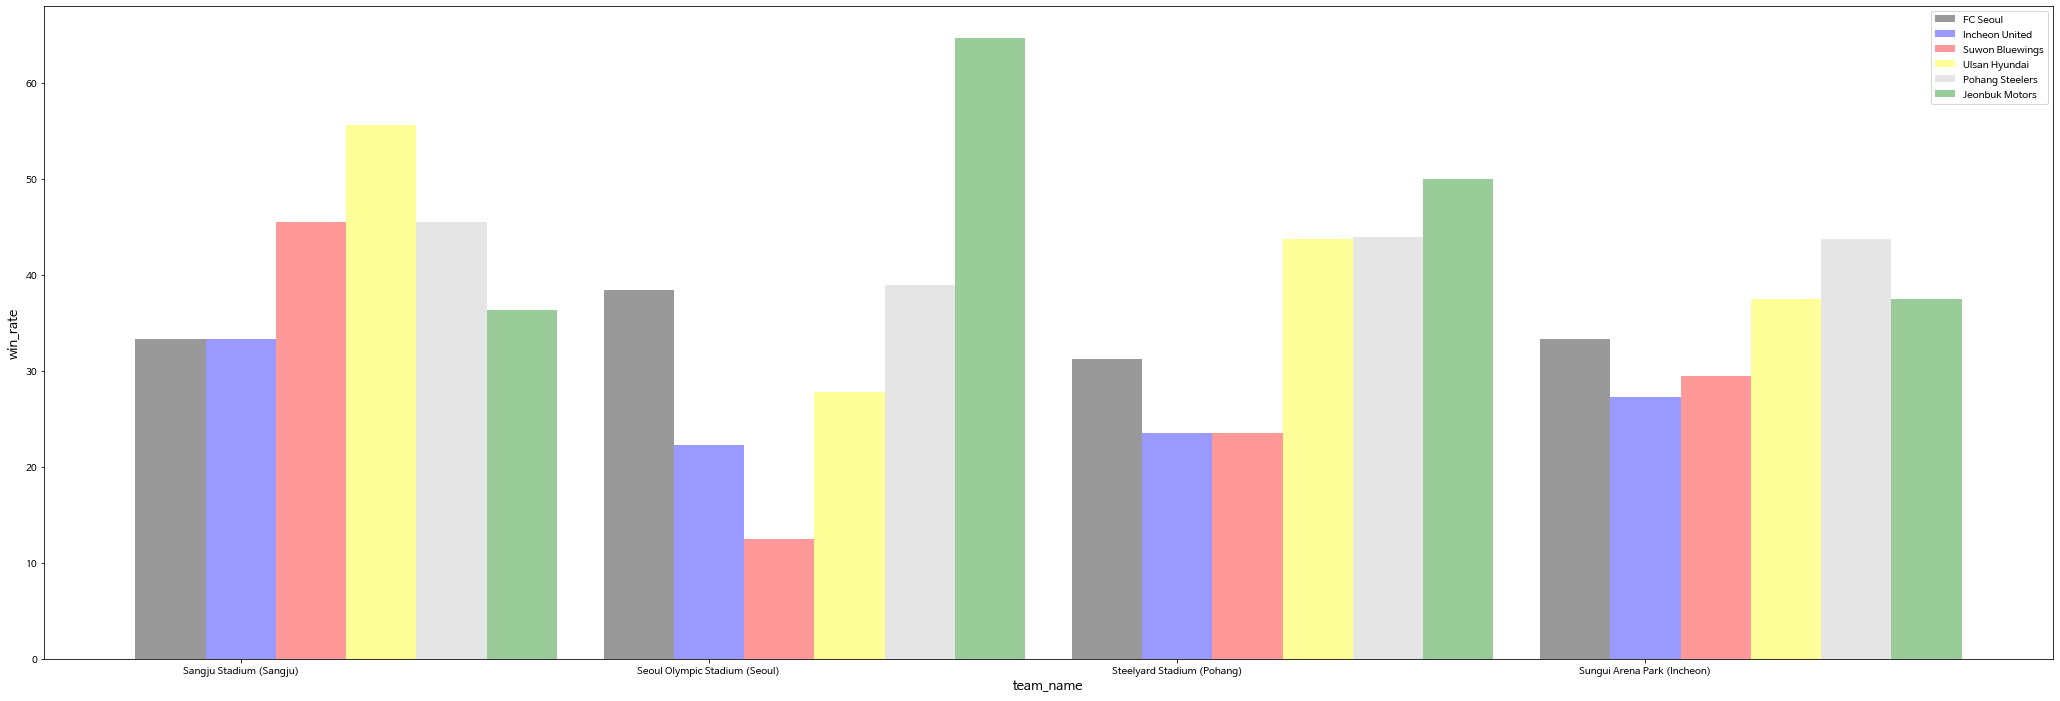

In [227]:
#3

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(36,12))
bar_width = 0.15

# 구장 갯수 선택
index = np.arange(4)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df.iloc[0, 9:13], bar_width, alpha=0.4, color='Black', label='FC Seoul')

b2 = plt.bar(index + bar_width, df.iloc[1, 9:13], bar_width, alpha=0.4, color='Blue', label='Incheon United')

b3 = plt.bar(index + 2 * bar_width, df.iloc[2, 9:13], bar_width, alpha=0.4, color='Red', label='Suwon Bluewings')

b4 = plt.bar(index + 3 * bar_width, df.iloc[3, 9:13], bar_width, alpha=0.4, color='Yellow', label='Ulsan Hyundai')

b5 = plt.bar(index + 4 * bar_width, df.iloc[4, 9:13], bar_width, alpha=0.4, color='Silver', label='Pohang Steelers')

b6 = plt.bar(index + 5 * bar_width, df.iloc[5, 9:13], bar_width, alpha=0.4, color='Green', label='Jeonbuk Motors')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 team_name 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), stadium[8:12])

# x축, y축 이름 및 범례 설정
plt.xlabel('team_name', size = 13)
plt.ylabel('win_rate', size = 13)
plt.legend()
plt.show()

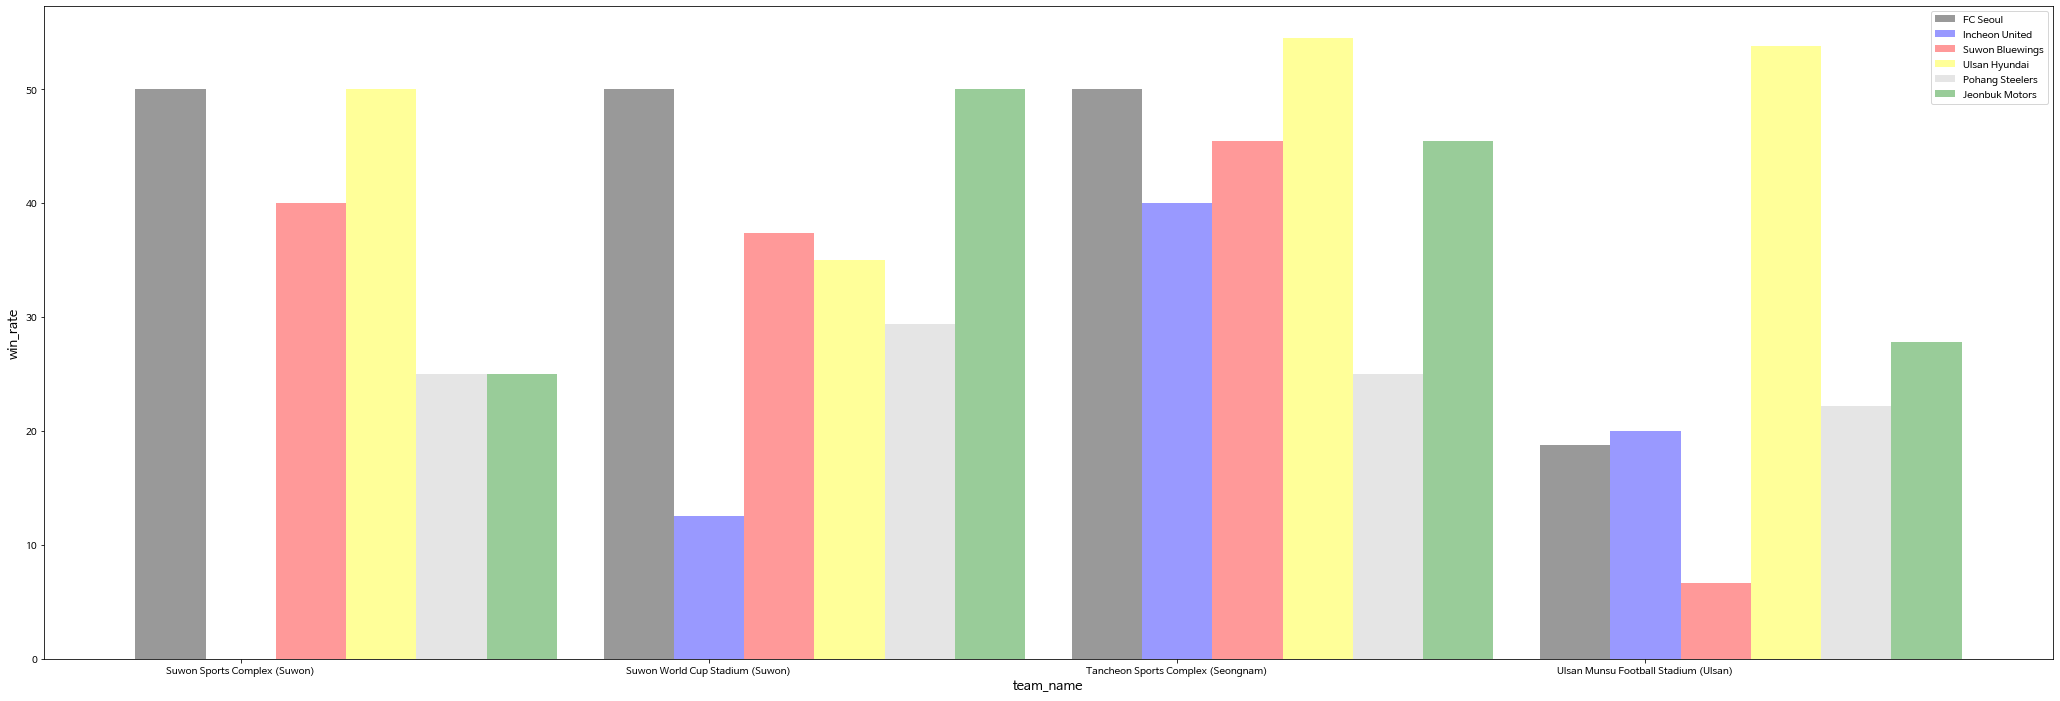

In [228]:
#4

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(36,12))
bar_width = 0.15

# 구장 갯수 선택
index = np.arange(4)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df.iloc[0, 13:17], bar_width, alpha=0.4, color='Black', label='FC Seoul')

b2 = plt.bar(index + bar_width, df.iloc[1, 13:17], bar_width, alpha=0.4, color='Blue', label='Incheon United')

b3 = plt.bar(index + 2 * bar_width, df.iloc[2, 13:17], bar_width, alpha=0.4, color='Red', label='Suwon Bluewings')

b4 = plt.bar(index + 3 * bar_width, df.iloc[3, 13:17], bar_width, alpha=0.4, color='Yellow', label='Ulsan Hyundai')

b5 = plt.bar(index + 4 * bar_width, df.iloc[4, 13:17], bar_width, alpha=0.4, color='Silver', label='Pohang Steelers')

b6 = plt.bar(index + 5 * bar_width, df.iloc[5, 13:17], bar_width, alpha=0.4, color='Green', label='Jeonbuk Motors')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 team_name 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), stadium[12:16])

# x축, y축 이름 및 범례 설정
plt.xlabel('team_name', size = 13)
plt.ylabel('win_rate', size = 13)
plt.legend()
plt.show()

### 02.2 역배가 가장 많이 터진 팀

In [229]:
betting_match = all_csv[(all_csv['odds_ft_away_team_win']!=all_csv['odds_ft_home_team_win'])&(all_csv['Winner_None'] == False)]

In [230]:
betting_match.reset_index(drop=True, inplace=True)
#betting_match['odds_ft_away_team_win']>betting_match['odds_ft_home_team_win']
betting_match['Awaybetwin'] = betting_match['odds_ft_away_team_win']>betting_match['odds_ft_home_team_win']

In [231]:
yb_match = betting_match[betting_match['Awaybetwin'] == betting_match['Winner_Away']]

In [232]:
from typing_extensions import TypeVarTuple
home_yb = yb_match[yb_match['Winner_Away']==False]
away_yb = yb_match[yb_match['Winner_Away']== True]

In [233]:
yb = home_yb['home_team_name'].value_counts() + away_yb['away_team_name'].value_counts()

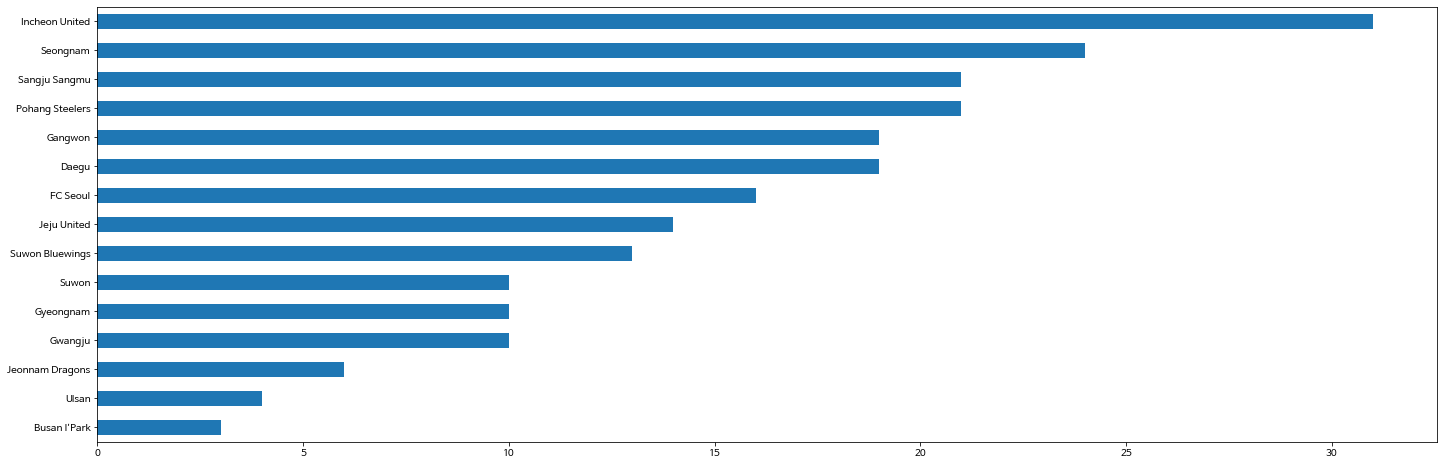

In [234]:
plt.figure(figsize=(24,8))
yb.sort_values(ascending=True).plot(kind='barh')

## 03. Players

In [235]:
player_flist = glob('/content/drive/MyDrive/AIFFEL/Datathon/Data/K1/players/k-league-1-players*.csv')

player_flist.sort()
all_player = pd.read_csv(player_flist[0])

for i in range(1, len(player_flist)):
  sample = pd.read_csv(player_flist[i])
  all_player = pd.concat([sample,all_player])
  all_player.reset_index(drop=True, inplace=True)

all_player

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aleksandar Paločević,28,745977600,1993/08/22,K League 1,2022,Midfielder,FC Seoul,1014,482,...,0.89,101,72,1014,0,0.09,72,131,-1,8
1,Alexander Grant,28,759283200,1994/01/23,K League 1,2022,Defender,Pohang Steelers,810,180,...,0.89,101,90,270,0,0.33,188,187,31,21
2,Ban-Suk Oh,33,580089600,1988/05/20,K League 1,2022,Defender,Incheon United,871,450,...,0.83,109,87,290,0,0.31,112,94,25,10
3,Ben Halloran,29,708480000,1992/06/14,K League 1,2022,Midfielder,FC Seoul,60,46,...,1.50,60,30,0,0,0.00,-1,-1,-1,23
4,Beom-Young Lee,33,607478400,1989/04/02,K League 1,2022,Goalkeeper,Suwon,90,90,...,4.00,23,90,0,0,0.00,-1,-1,-1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4048,Young-Sun Gong,34,542246400,1987/03/09,K League 1,2013,Forward,Jeonnam Dragons,372,86,...,1.21,74,53,0,0,0.00,225,117,-1,16
4049,Young-Sun Yun,33,591926400,1988/10/04,K League 1,2013,Defender,Seongnam,3074,1477,...,1.08,83,85,512,0,0.18,152,278,52,10
4050,Young-Wook Kim,30,672883200,1991/04/29,K League 1,2013,Midfielder,Jeonnam Dragons,783,242,...,1.15,78,56,0,0,0.00,306,185,-1,30
4051,Yun-Pyo Lee,37,463104000,1984/09/04,K League 1,2013,Defender,Incheon United,2669,1319,...,1.08,83,89,267,0,0.34,182,250,51,14


In [236]:
# top 5 teams
top6_team = ['FC Seoul', 'Incheon United', 'Jeonbuk Motors', 'Pohang Steelers', 'Suwon Bluewings', 'Ulsan']
top6_player = all_player[all_player['Current Club'].isin(top6_team)]
top6_player

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,...,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aleksandar Paločević,28,745977600,1993/08/22,K League 1,2022,Midfielder,FC Seoul,1014,482,...,0.89,101,72,1014,0,0.09,72,131,-1,8
1,Alexander Grant,28,759283200,1994/01/23,K League 1,2022,Defender,Pohang Steelers,810,180,...,0.89,101,90,270,0,0.33,188,187,31,21
2,Ban-Suk Oh,33,580089600,1988/05/20,K League 1,2022,Defender,Incheon United,871,450,...,0.83,109,87,290,0,0.31,112,94,25,10
3,Ben Halloran,29,708480000,1992/06/14,K League 1,2022,Midfielder,FC Seoul,60,46,...,1.50,60,30,0,0,0.00,-1,-1,-1,23
6,Bo-Kyung Choi,34,576806400,1988/04/12,K League 1,2022,Defender,Jeonbuk Motors,362,180,...,0.25,362,72,0,362,0.00,98,23,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,Young-Jin Kwon,30,664588800,1991/01/23,K League 1,2013,Defender,Jeonbuk Motors,134,0,...,2.69,34,67,67,0,1.34,-1,-1,-1,18
4041,Young-Jun Shin,32,621043200,1989/09/06,K League 1,2013,Midfielder,Pohang Steelers,357,178,...,1.26,71,22,0,0,0.00,10,235,-1,11
4042,Young-Kwang Kim,38,425606400,1983/06/28,K League 1,2013,Goalkeeper,Ulsan,540,270,...,1.50,60,90,0,0,0.00,314,1,94,19
4045,Young-Sam Kim,39,386726400,1982/04/04,K League 1,2013,Midfielder,Ulsan,2174,1121,...,0.79,114,84,544,0,0.17,175,210,-1,12


In [237]:
top6_player['season'] = top6_player['season'].apply(str)
top6_player['name_season'] = top6_player['full_name'] + top6_player['season']

### 03.1.1 Forward Performance

In [238]:
forward = top6_player[top6_player['position'] == 'Forward']
forward[['full_name', 'Current Club','season', 'goals_overall','goals_home','goals_away']].sort_values(by = 'goals_overall', ascending=False).head(15)


,full_name,Current Club,season,goals_overall,goals_home,goals_away
852,Gleidionor Figueiredo Pinto Júnior,Ulsan,2020,26,11,15
1661,Gleidionor Figueiredo Pinto Júnior,Ulsan,2018,22,10,12
2174,Johnathan Aparecido da Silva,Suwon Bluewings,2017,22,12,10
1153,Adam Taggart,Suwon Bluewings,2019,20,5,15
2051,Dejan Damjanović,FC Seoul,2017,19,10,9
1240,Gleidionor Figueiredo Pinto Júnior,Ulsan,2019,19,10,9
1910,Stefan Mugoša,Incheon United,2018,19,8,11
1086,Stanislav Iljutcenko,Pohang Steelers,2020,19,12,7
3658,Dejan Damjanović,FC Seoul,2013,19,14,5
2062,Dong-Hyun Yang,Pohang Steelers,2017,19,10,9


In [239]:
PlayerSpotlight("Gleidionor Figueiredo Pinto Júnior2020")
PlayerSpotlight("Johnathan Aparecido da Silva2017")
PlayerSpotlight("Adam Taggart2019")
PlayerSpotlight("Dejan Damjanović2017")
PlayerSpotlight("Stefan Mugoša2018")
PlayerFight("Gleidionor Figueiredo Pinto Júnior2020", "Johnathan Aparecido da Silva2017", "Adam Taggart2019", "Dejan Damjanović2017")

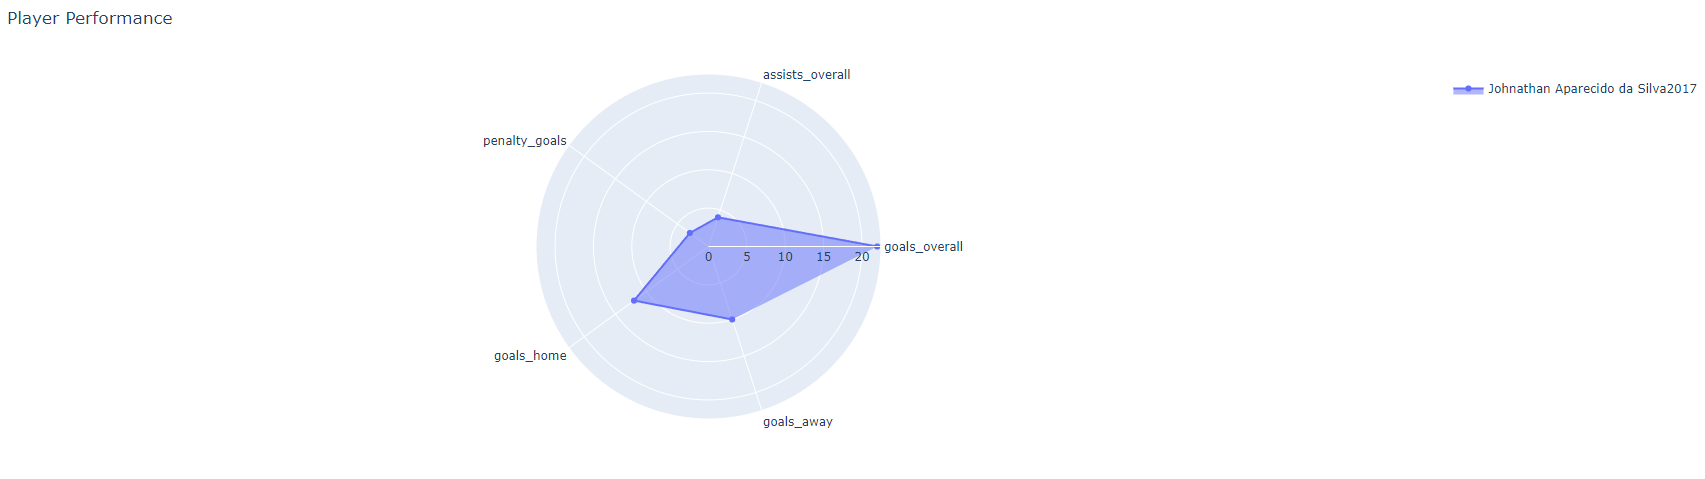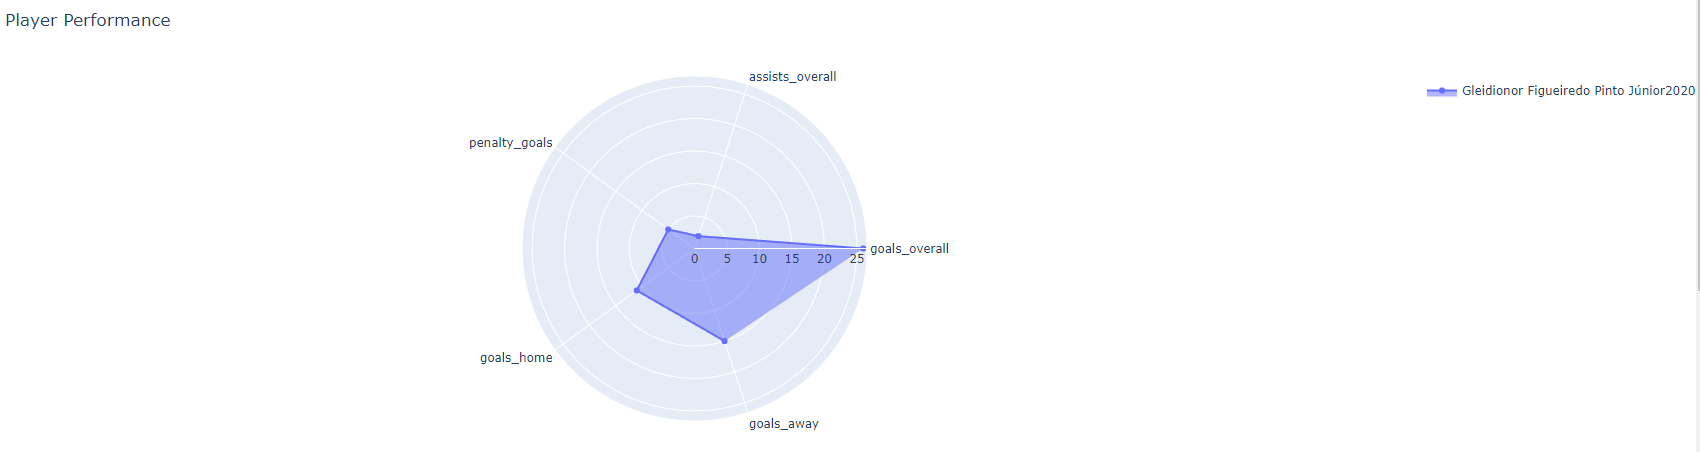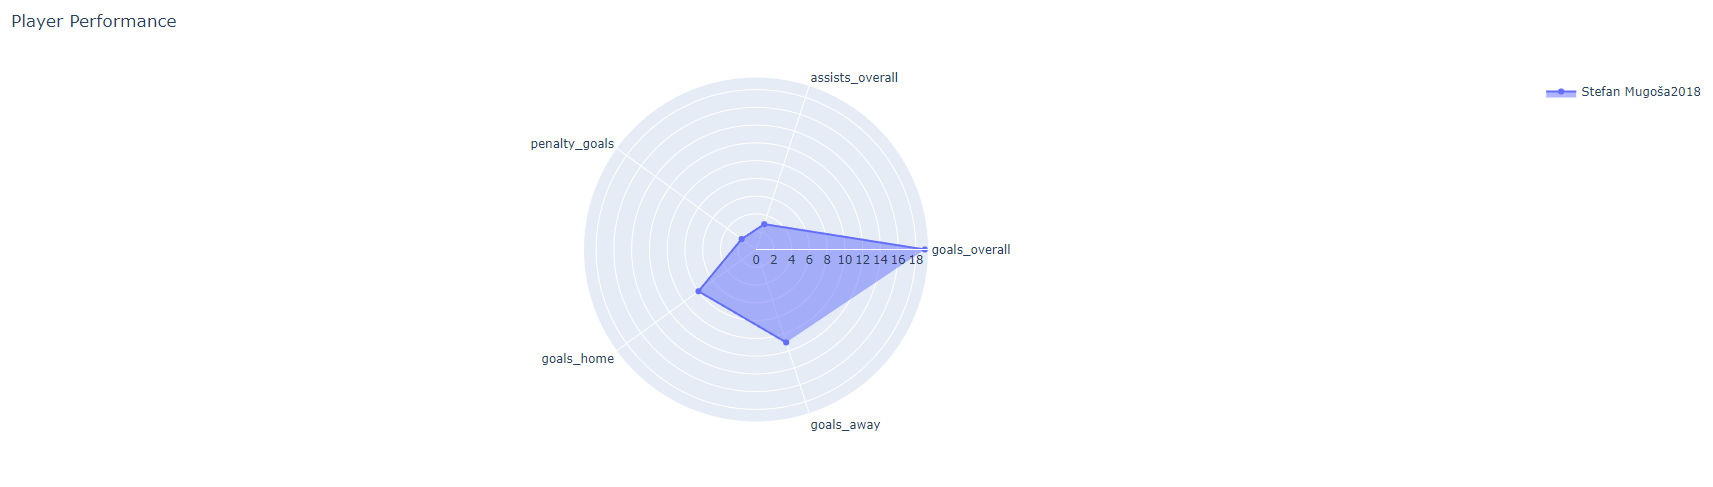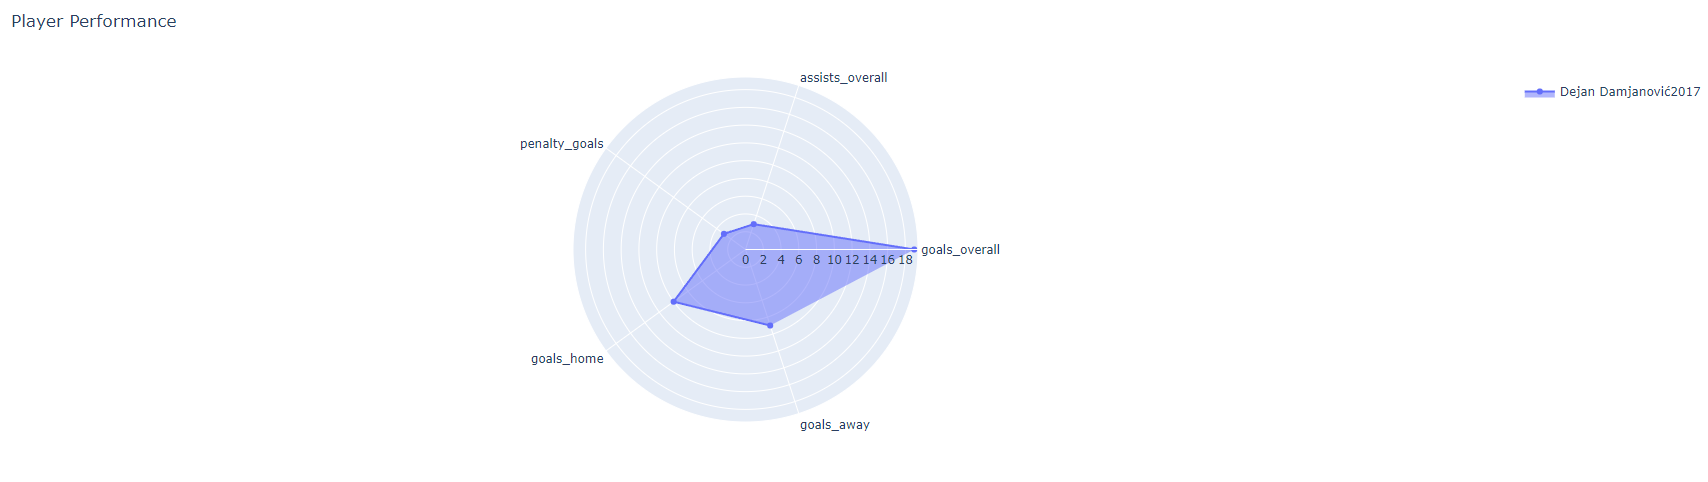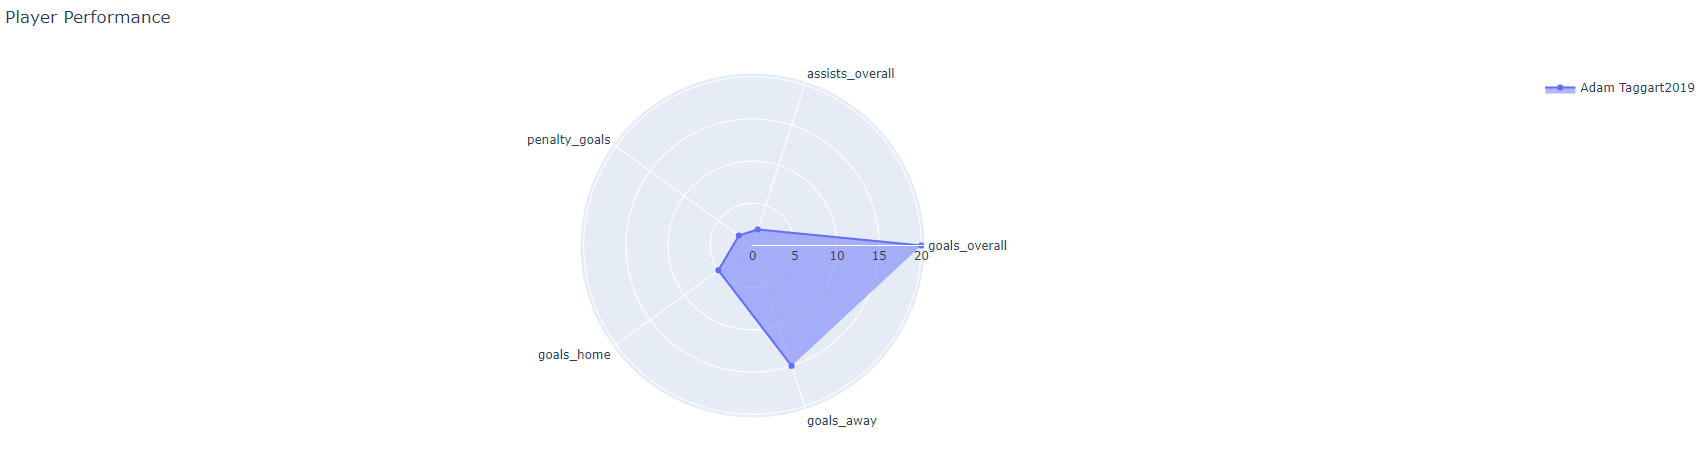

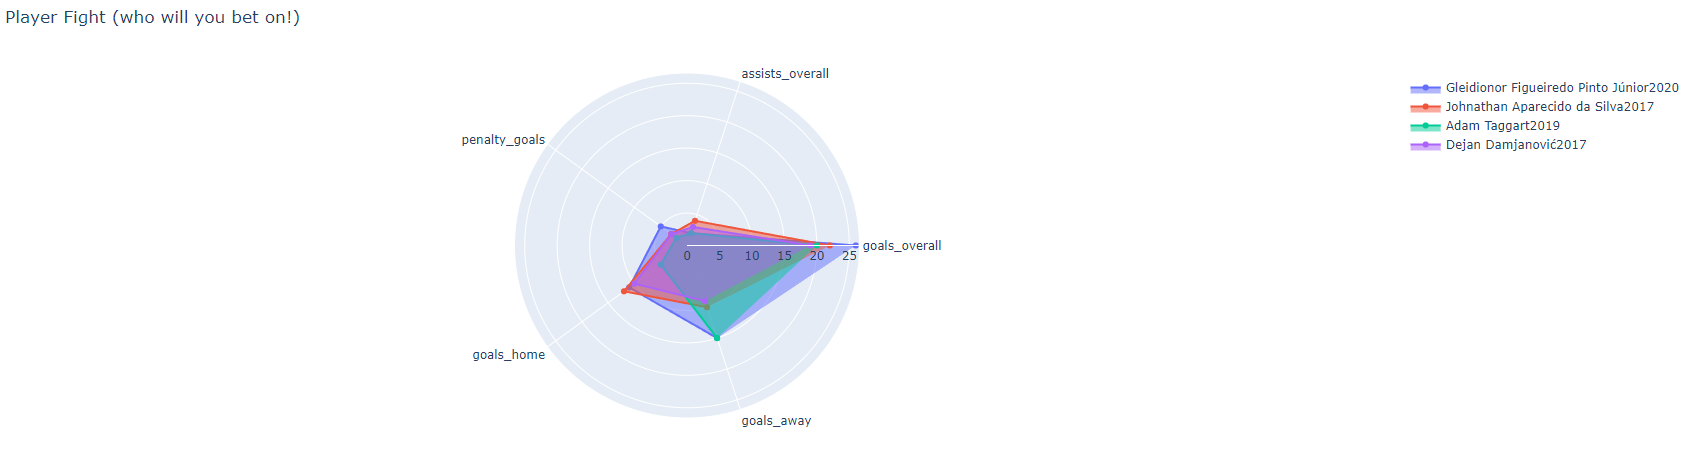

In [240]:
condition = (top6_player['penalty_goals'] > 0) | (top6_player['penalty_misses'] > 0)
penalty_kicker = top6_player[condition]
penalty_kicker['penalty_prob'] = penalty_kicker['penalty_goals'] / (penalty_kicker['penalty_goals'] + penalty_kicker['penalty_misses'])
penalty_kicker[['full_name', 'Current Club','season', 'position','penalty_goals','penalty_misses', 'penalty_prob']].sort_values(by = 'penalty_goals', ascending=False).head(10)

,full_name,Current Club,season,position,penalty_goals,penalty_misses,penalty_prob
2412,Carlos Adriano de Sousa Cruz,FC Seoul,2016,Forward,6,0,1.0
448,Gustavo Henrique da Silva Sousa,Jeonbuk Motors,2021,Forward,5,0,1.0
852,Gleidionor Figueiredo Pinto Júnior,Ulsan,2020,Forward,5,0,1.0
694,Stanislav Iljutcenko,Jeonbuk Motors,2021,Forward,4,0,1.0
2818,Carlos Adriano de Sousa Cruz,FC Seoul,2015,Forward,4,0,1.0
1155,Aleksandar Paločević,Pohang Steelers,2019,Midfielder,4,0,1.0
2736,Sung-Hwan Kim,Ulsan,2016,Midfielder,4,0,1.0
3002,Joon-Ho Son,Pohang Steelers,2015,Midfielder,4,0,1.0
294,Stefan Mugoša,Incheon United,2022,Forward,4,0,1.0
2031,Chu-Young Park,FC Seoul,2017,Forward,3,0,1.0


In [241]:
penalty_kicker[['full_name', 'Current Club','season', 'position','penalty_goals','penalty_misses','penalty_prob']].sort_values(by = 'penalty_goals', ascending=False).head(10)

,full_name,Current Club,season,position,penalty_goals,penalty_misses,penalty_prob
2412,Carlos Adriano de Sousa Cruz,FC Seoul,2016,Forward,6,0,1.0
448,Gustavo Henrique da Silva Sousa,Jeonbuk Motors,2021,Forward,5,0,1.0
852,Gleidionor Figueiredo Pinto Júnior,Ulsan,2020,Forward,5,0,1.0
694,Stanislav Iljutcenko,Jeonbuk Motors,2021,Forward,4,0,1.0
2818,Carlos Adriano de Sousa Cruz,FC Seoul,2015,Forward,4,0,1.0
1155,Aleksandar Paločević,Pohang Steelers,2019,Midfielder,4,0,1.0
2736,Sung-Hwan Kim,Ulsan,2016,Midfielder,4,0,1.0
3002,Joon-Ho Son,Pohang Steelers,2015,Midfielder,4,0,1.0
294,Stefan Mugoša,Incheon United,2022,Forward,4,0,1.0
2031,Chu-Young Park,FC Seoul,2017,Forward,3,0,1.0


### 03.1.2 GoalKeeper Performance

In [242]:
goalkeeper = top6_player[top6_player['position'] == 'Goalkeeper']
goalkeeper[['full_name', 'Current Club','season', 'position','clean_sheets_overall','clean_sheets_home','clean_sheets_away']].sort_values(by = 'clean_sheets_overall', ascending=False).head(10)

,full_name,Current Club,season,position,clean_sheets_overall,clean_sheets_home,clean_sheets_away
3537,Sun-Tae Kwoun,Jeonbuk Motors,2014,Goalkeeper,20,10,10
1588,Bum-Keun Song,Jeonbuk Motors,2018,Goalkeeper,19,8,11
2921,Hwa-Yong Shin,Pohang Steelers,2015,Goalkeeper,17,6,11
1167,Bum-Keun Song,Jeonbuk Motors,2019,Goalkeeper,15,7,8
380,Bum-Keun Song,Jeonbuk Motors,2021,Goalkeeper,15,8,7
491,Hyun-Woo Cho,Ulsan,2021,Goalkeeper,15,8,7
3313,Hwa-Yong Shin,Pohang Steelers,2014,Goalkeeper,14,8,6
3939,Seung-Gyu Kim,Ulsan,2013,Goalkeeper,14,9,5
3544,Sung-Ryong Jung,Suwon Bluewings,2014,Goalkeeper,13,5,8
2110,Hwa-Yong Shin,Suwon Bluewings,2017,Goalkeeper,13,8,5


In [243]:
PlayerSpotlight("Sun-Tae Kwoun2014")
PlayerSpotlight("Bum-Keun Song2018")
PlayerSpotlight("Hwa-Yong Shin2015")
PlayerSpotlight("Hyun-Woo Cho2021")
PlayerSpotlight("Seung-Gyu Kim2013")
PlayerFight("Sun-Tae Kwoun2014", "Bum-Keun Song2018", "Hwa-Yong Shin2015", "Hyun-Woo Cho2021")

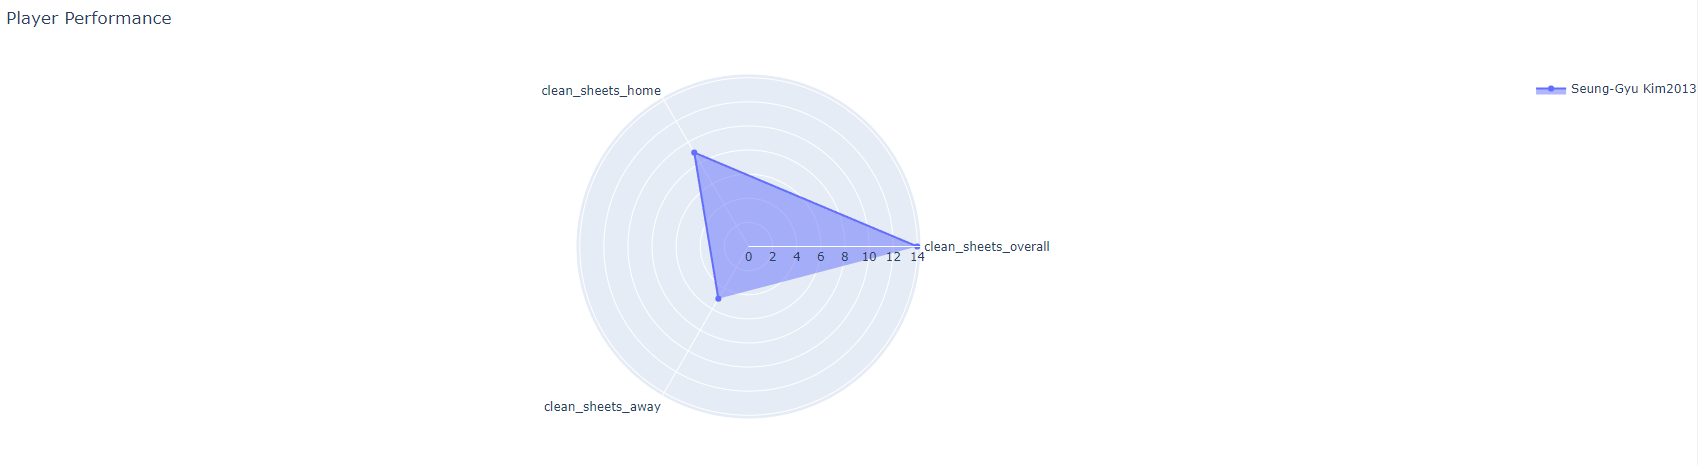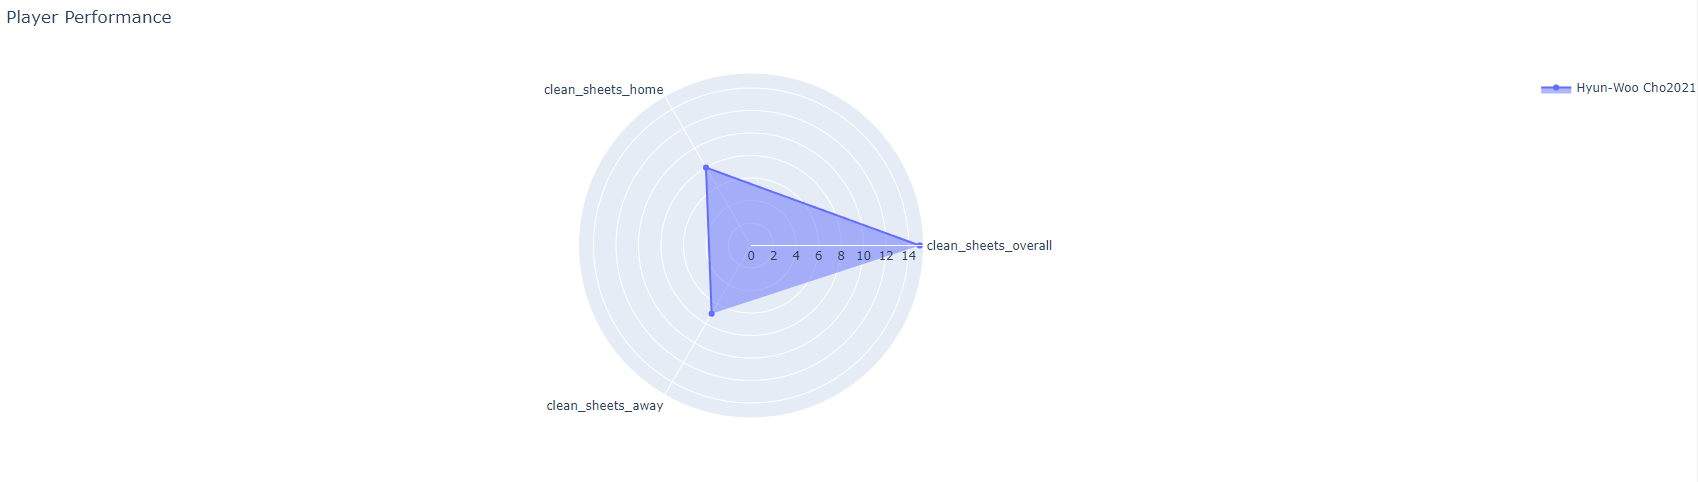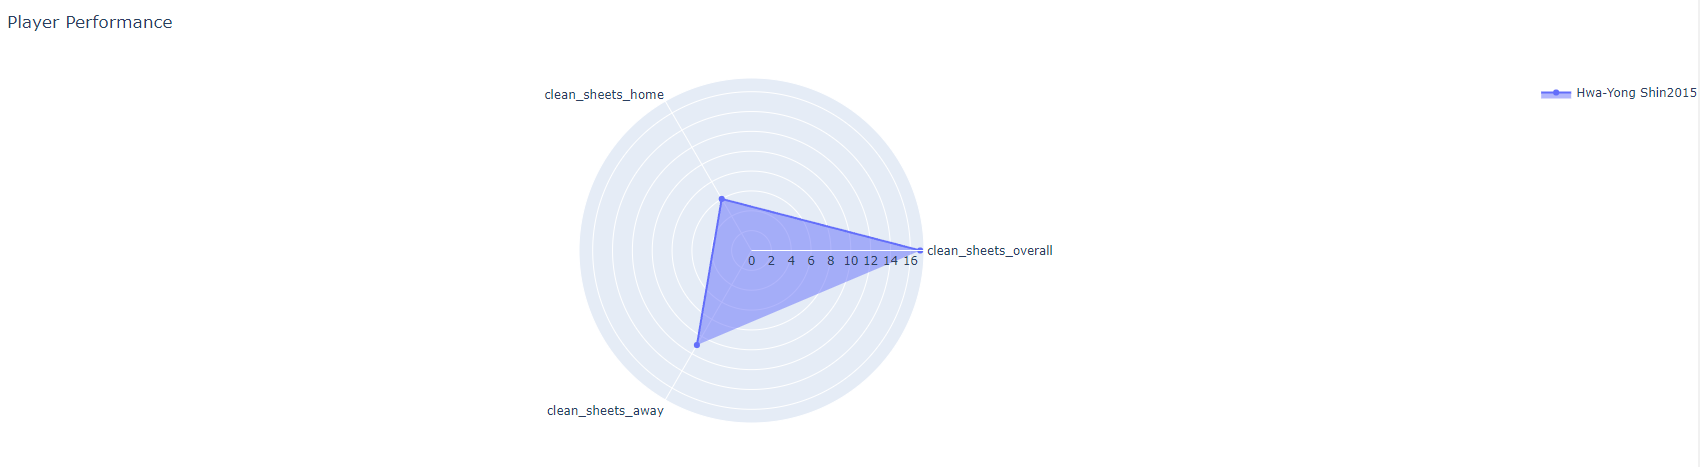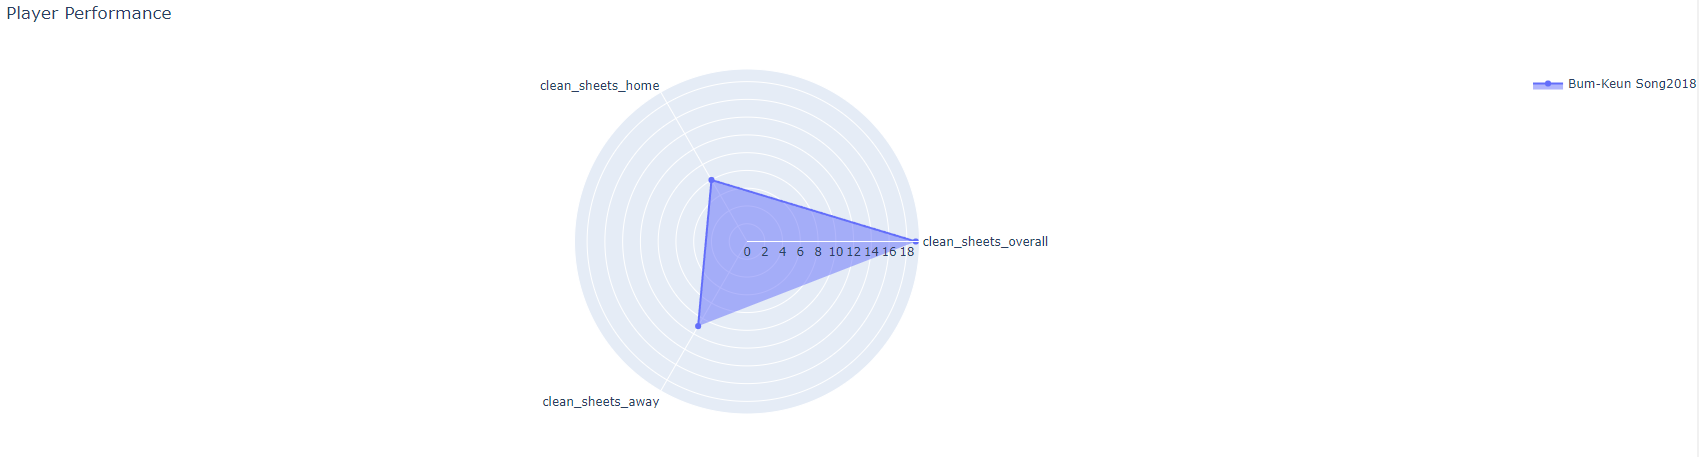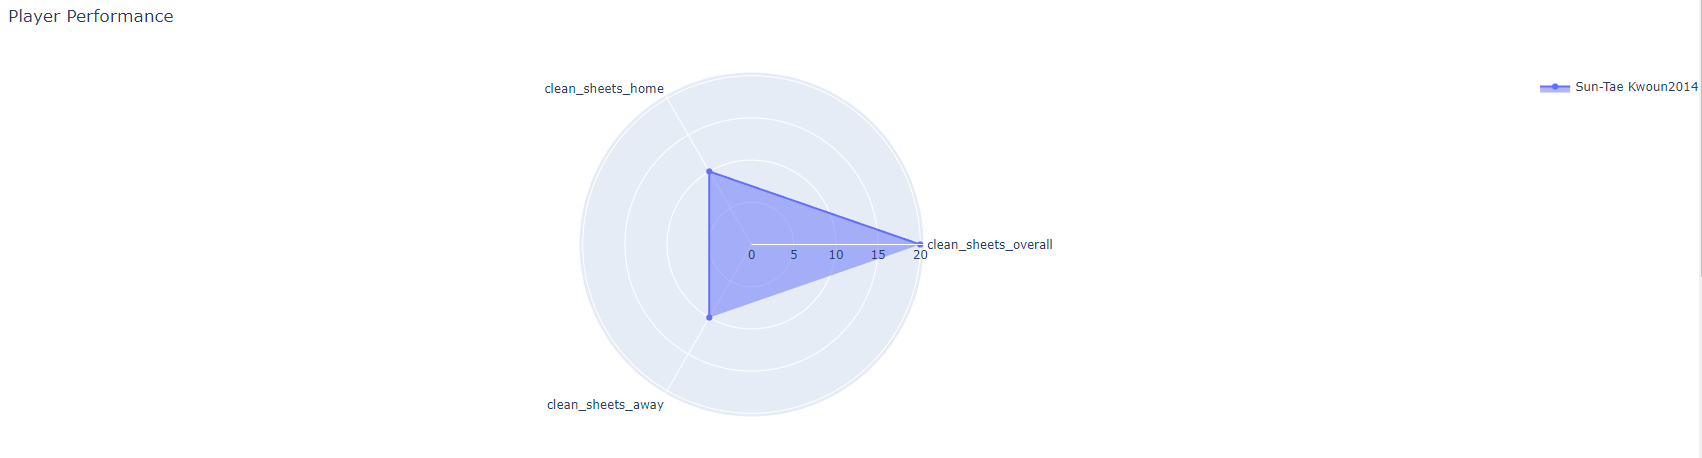

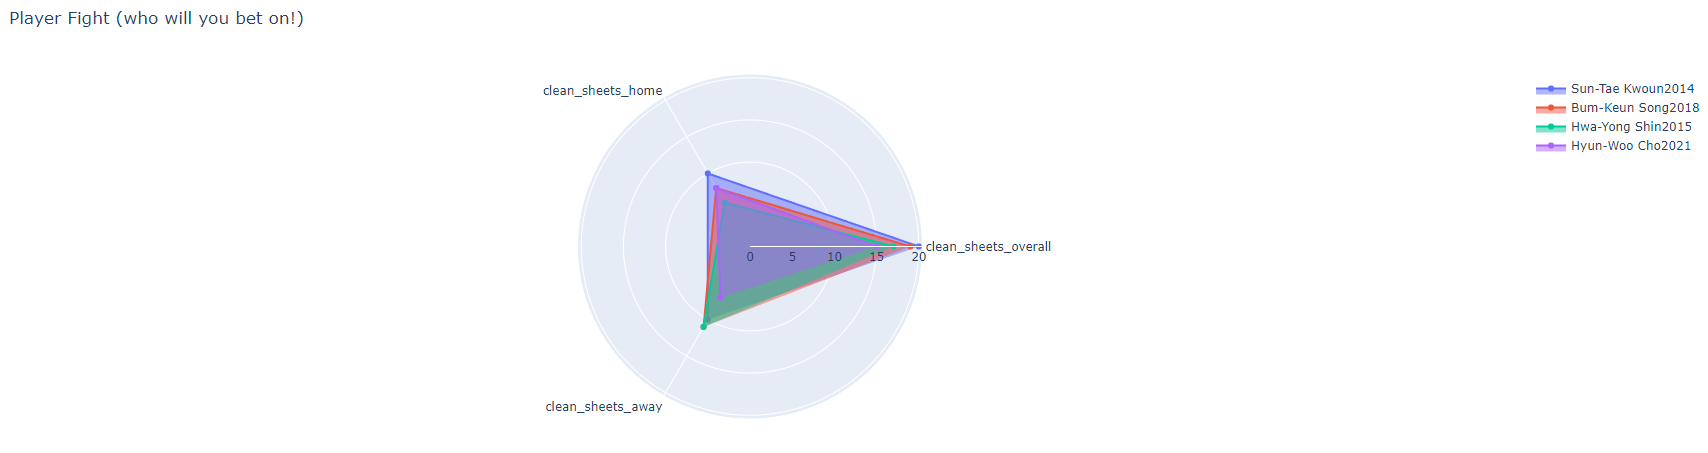

### 03.1.3 Influence Player

In [244]:
top6_player[['full_name', 'Current Club','season', 'assists_overall','assists_home','assists_away']].sort_values(by = 'assists_overall', ascending=False).head(15)


,full_name,Current Club,season,assists_overall,assists_home,assists_away
2191,Joon-Ho Son,Pohang Steelers,2017,12,7,5
1051,Sang-Woo Kang,Pohang Steelers,2020,12,7,5
2210,Ki-Hun Yeom,Suwon Bluewings,2017,12,5,7
2130,Il-Lok Yun,FC Seoul,2017,12,6,6
1648,Elías Fernando Aguilar Vargas,Incheon United,2018,11,4,7
1972,Yong Lee,Jeonbuk Motors,2018,11,2,9
1455,Seon-Min Moon,Jeonbuk Motors,2019,10,7,3
369,Bo-Kyung Kim,Jeonbuk Motors,2021,10,8,2
2145,Jae-Sung Lee,Jeonbuk Motors,2017,10,3,7
652,Sang-Woo Kang,Pohang Steelers,2021,8,5,3


### 03.2 Team

- Player Average Data by Teams

In [245]:
cm = sns.light_palette("#bc9b1b", as_cmap=True)
plotdata = top6_player
display(plotdata.groupby('Current Club')['assists_overall','goals_overall',"penalty_goals","clean_sheets_overall"].mean().style.background_gradient(cmap=cm))

,assists_overall,goals_overall,penalty_goals,clean_sheets_overall
Current Club,,,,
FC Seoul,0.458333,1.315476,0.133929,4.166667
Incheon United,0.363636,1.032258,0.090909,4.049853
Jeonbuk Motors,0.733333,1.824242,0.142424,5.927273
Pohang Steelers,0.600000,1.465625,0.090625,4.768750
Suwon Bluewings,0.447293,1.310541,0.108262,4.247863
Ulsan,0.670927,1.670927,0.143770,4.993610


- Player Data by Seasons

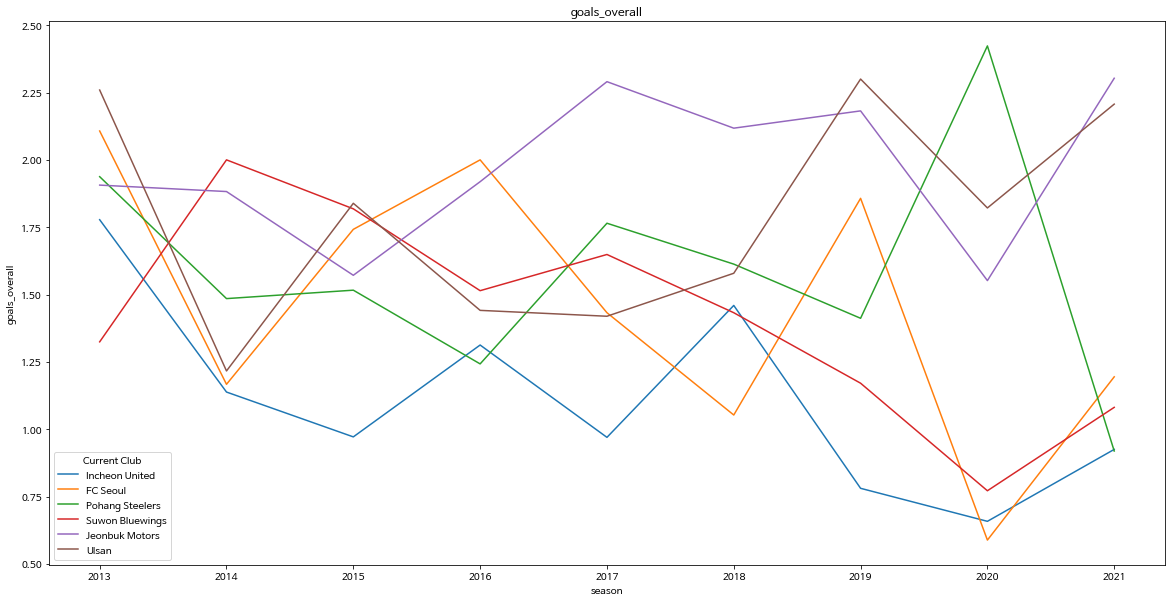

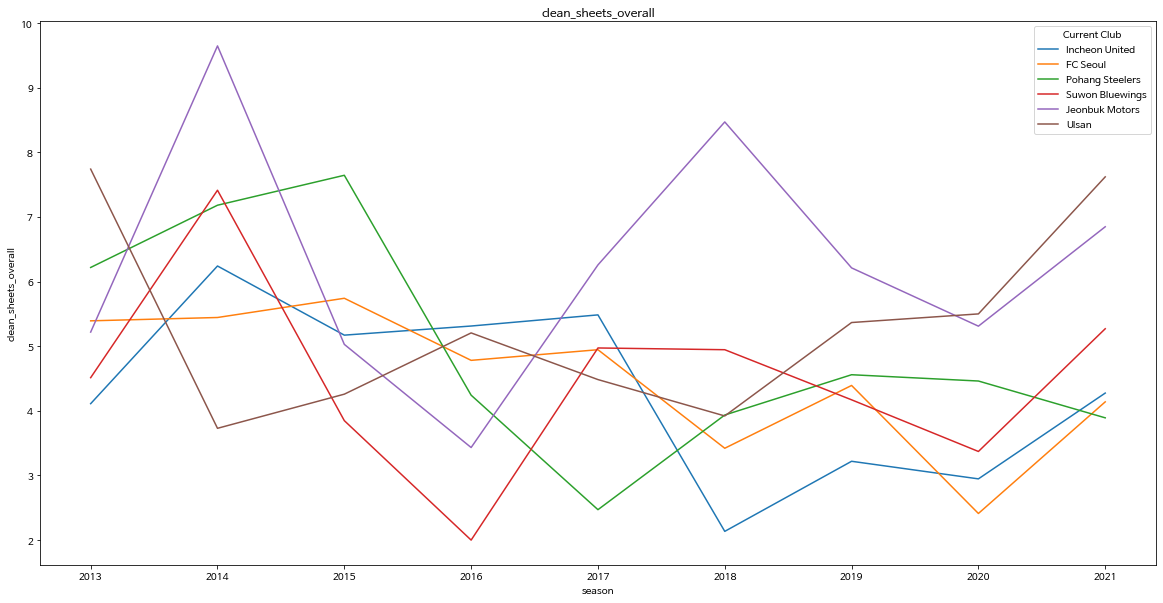

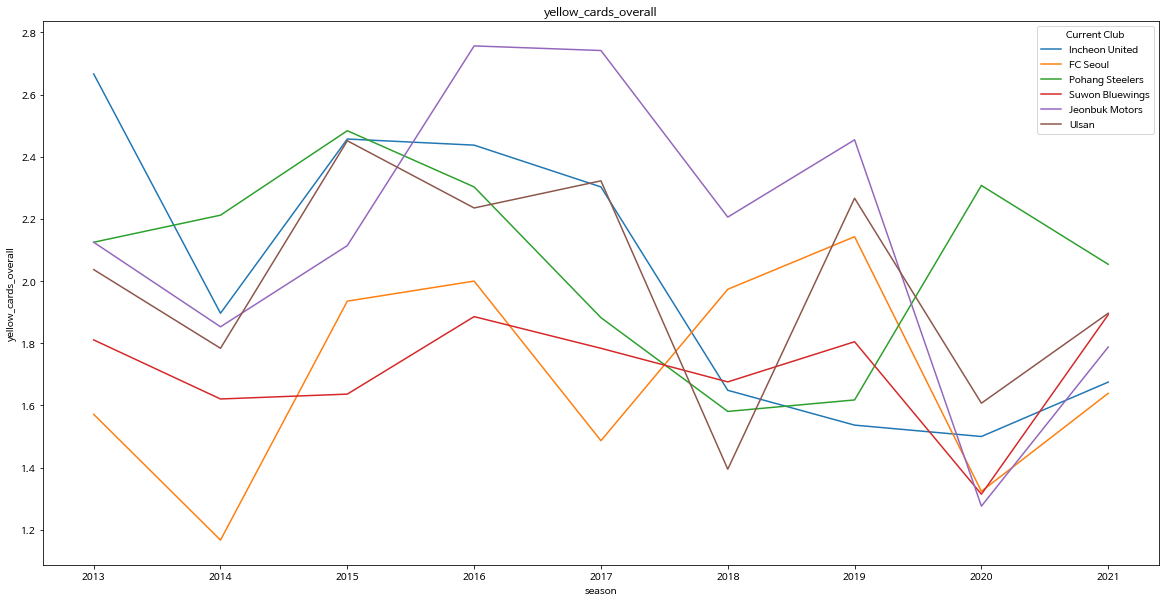

In [246]:
SeasonPerformance('goals_overall')
SeasonPerformance('clean_sheets_overall')
SeasonPerformance('yellow_cards_overall')

### 03.3 Age

- 구단별 나이에 따른 선수 비율과 활약상

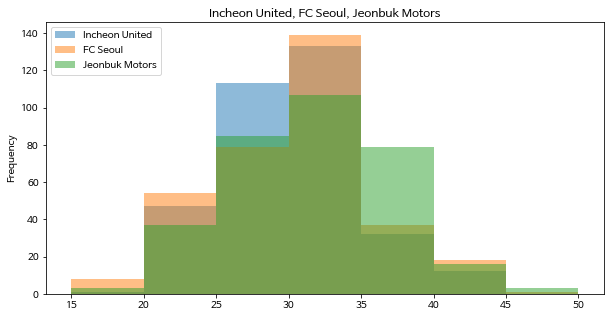

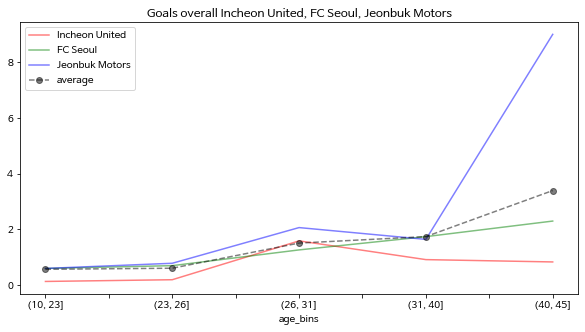

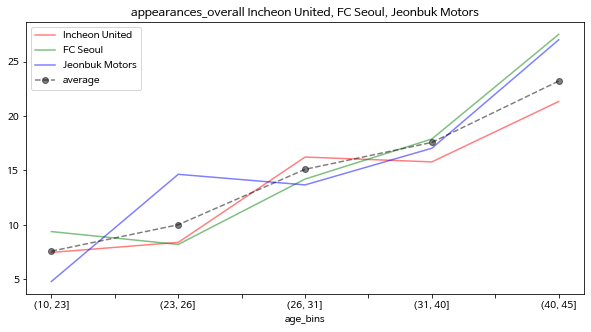

In [247]:
players_age('Incheon United','FC Seoul','Jeonbuk Motors')

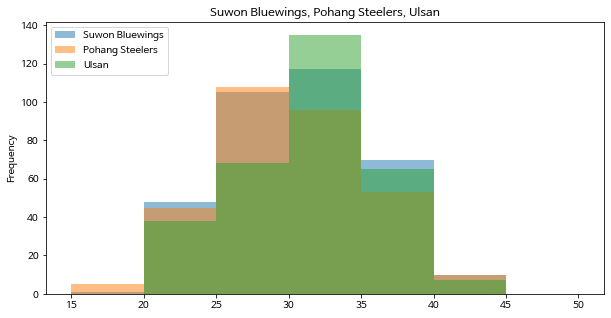

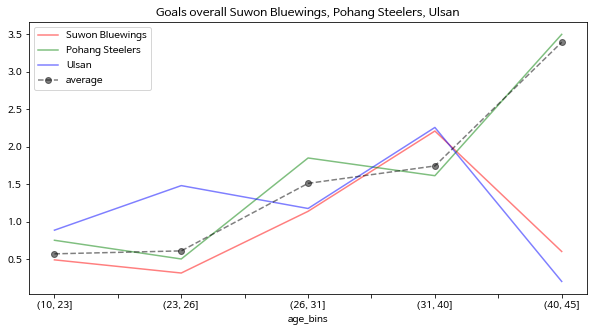

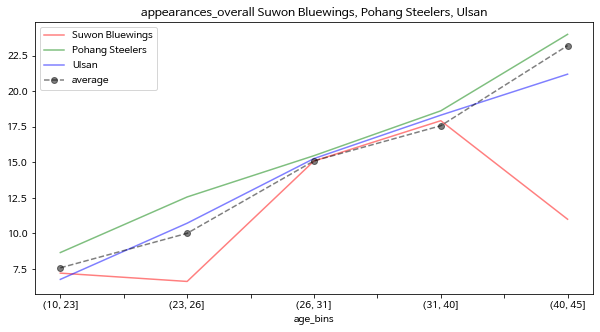

In [248]:
players_age('Suwon Bluewings','Pohang Steelers','Ulsan')

- Position별 나이에 따른 출전 횟수

Text(0.5, 1.0, 'Position appearances Overall by Age')

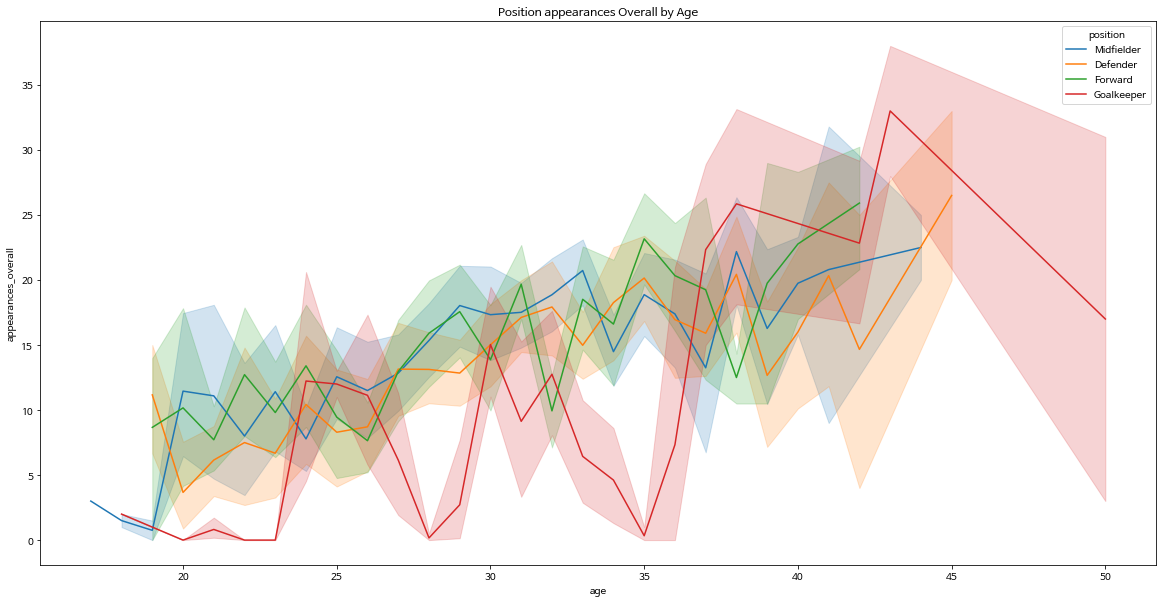

In [249]:
fig, ax = plt.subplots(figsize=(20, 10))
p = sns.lineplot(x="age", y="appearances_overall", hue="position", data=top6_player[top6_player['age']>0], ax=ax)
plt.title('Position appearances Overall by Age')

### 03.4 Nationality

- 국가별 활약: goals_overall, assists_overall

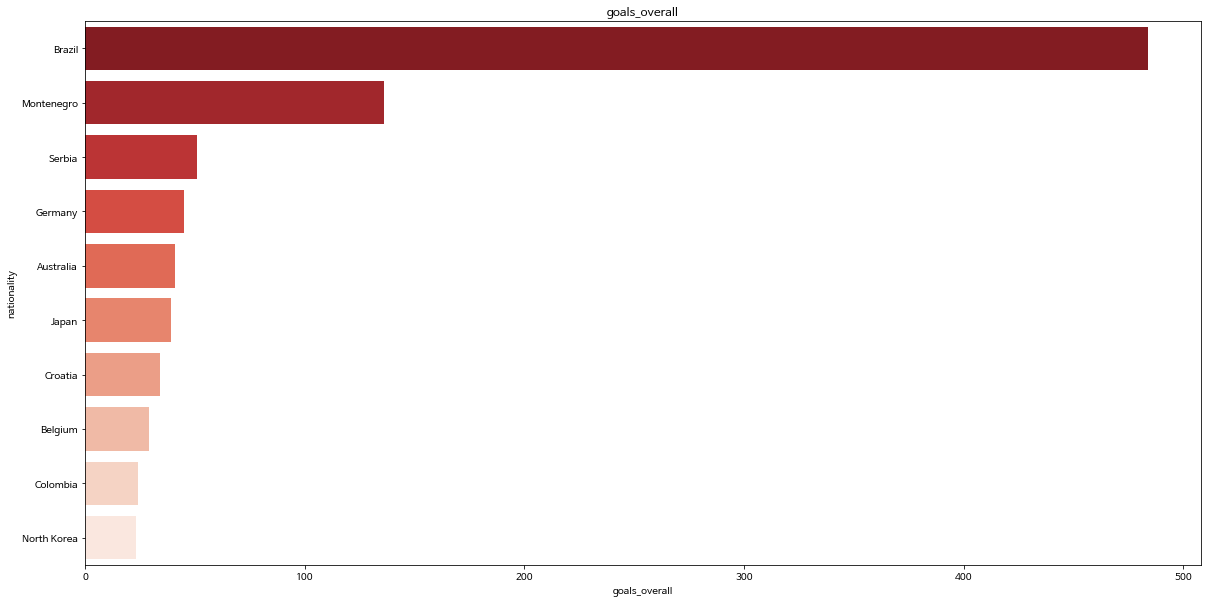

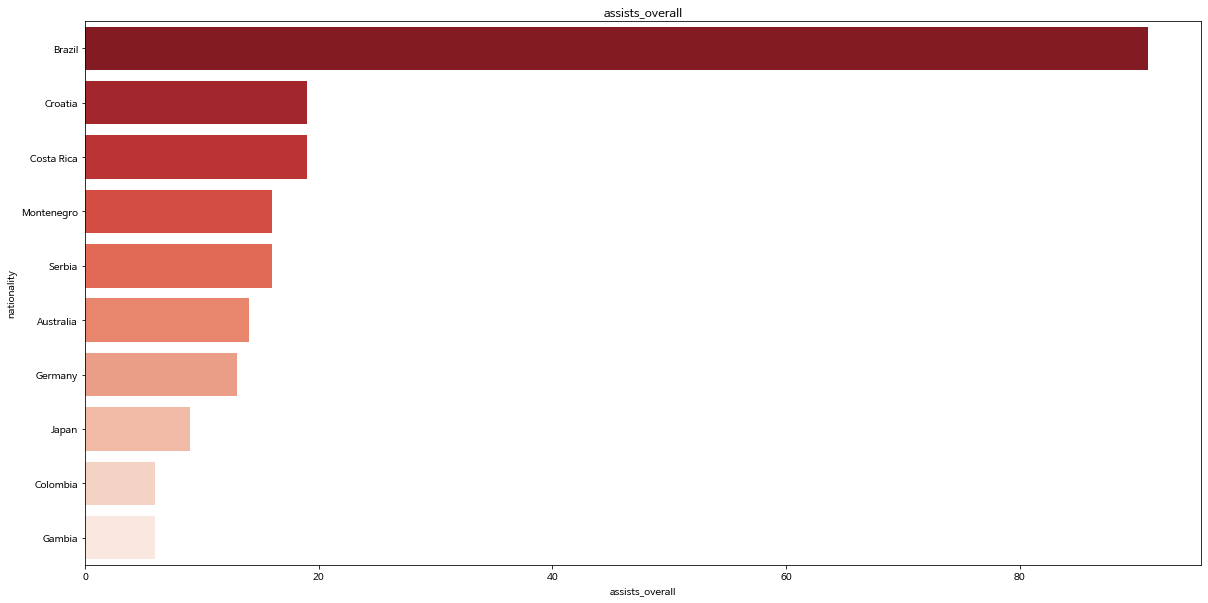

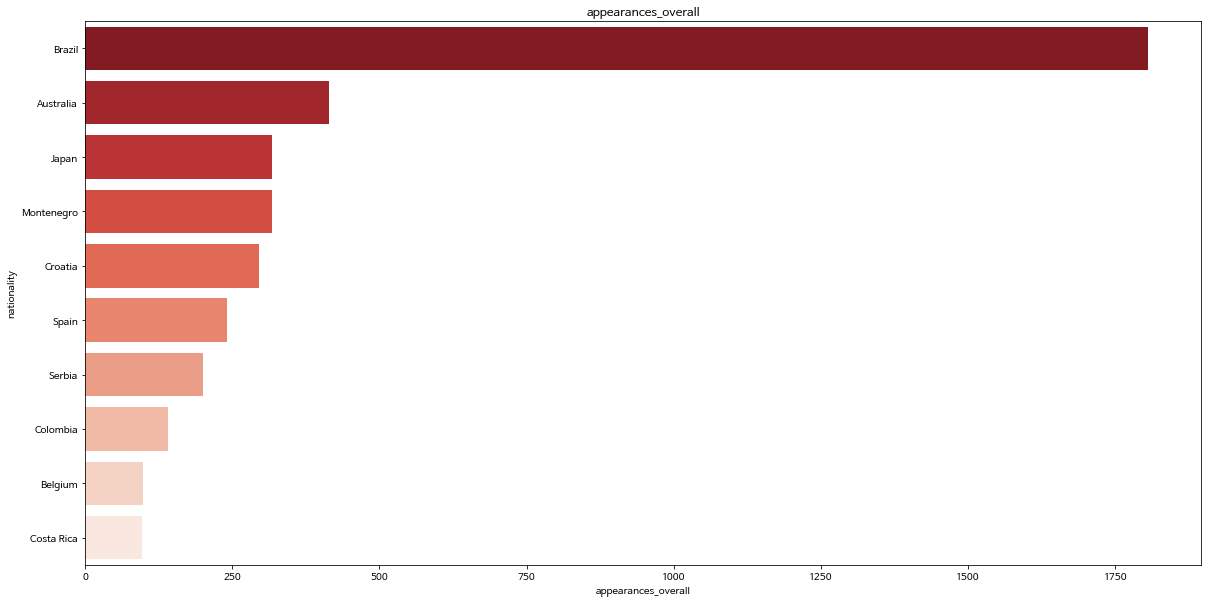

In [250]:
ForeignerPerformance('goals_overall')
ForeignerPerformance('assists_overall')
ForeignerPerformance('appearances_overall')

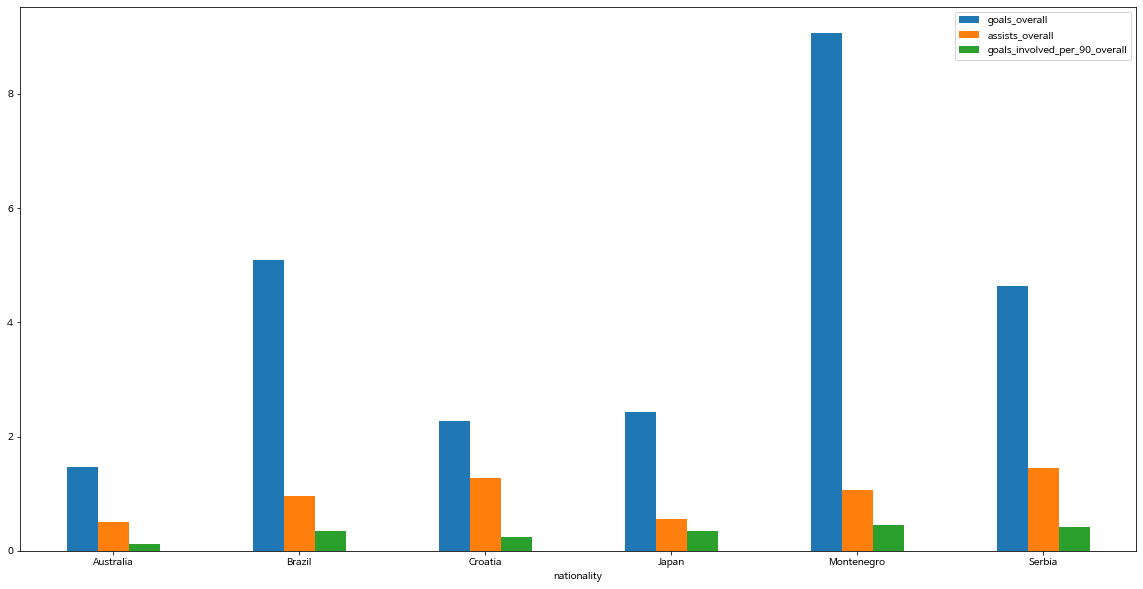

In [251]:
foreigner = top6_player[top6_player['nationality'] != 'South Korea'].value_counts('nationality')
foreigner_check = foreigner.index[:6].to_list()
foreigner_top6 = top6_player[top6_player['nationality'].isin(foreigner_check)]


foreigner_groups = foreigner_top6.groupby('nationality').mean()
foreigner_groups[['goals_overall', 'assists_overall', 'goals_involved_per_90_overall']].plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0)

plt.show()